### BADASS Analysis - can we better tell the difference between glutamate, arginine, serine, valine and tryptophan using a larger array of barrels?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### Parse in input data

Large array amino acid data

In [3]:
l_aa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Analysis/Large_array/Large_array_AAs/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Analysis/Large_array/Large_array_AAs/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Large_array/Large_array_AAs/?y


Small array amino acid data

In [4]:
s_aa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/AAs/Reformatted_AA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],  # Using 10 repeats even though 20 are available to match the amount of data available for the larger array
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex',
                  'Hex2', 'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Analysis/Large_array/Standard_array_AAs/',
    control_peptides=['GRP35'],
    control_analytes=['A', 'N', 'D', 'C', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'T', 'Y']
)

Directory Analysis/Large_array/Standard_array_AAs/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Large_array/Standard_array_AAs/?y


Locate xlsx files

In [5]:
l_aa_fluor_data.group_xlsx_repeats()

In [6]:
s_aa_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [7]:
l_aa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/W_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/S_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/E_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/R_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/V_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/R_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/V_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Refo

In [8]:
s_aa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/AAs/Reformatted_AA_csvs/S_T_V_W_Y_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/AAs/Reformatted_AA_csvs/A_C_D_N_R_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/AAs/Reformatted_AA_csvs/F_K_L_M_P_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/AAs/Reformatted_AA_csvs/E_G_H_I_Q_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/AAs/Reformatted_AA_csvs/E_G_H_I_Q_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/AAs/Reformatted_AA_csvs/F_K_L_M_P_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/AAs/Reformatted_AA_csvs/A_C_D_N_R_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfs

Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [9]:
l_aa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: R, 8 (flagged readings = QLKEIA: 1.1058902102013586, NLKEIA: 0.6432415609183197, CCHex2: 0.44921957754392083, CCHept: 0.38990660557669954) 
 Outlier excluded from final output dataset: R, 6 (flagged readings = CCPent-I24K: 0.36275988972394413) 
 Outlier excluded from final output dataset: E, 3 (flagged readings = CCHept-I17A-L21A: 0.4913996193607859) 


In [10]:
s_aa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

In [11]:
l_aa_fluor_data.ml_fluor_data

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W     GRP22  \
0   0.923840  1.520000     0.870054     0.854396     0.912125  0.795706   
1   1.042266  1.515723     0.886029     0.936381     0.949879  0.896599   
2   1.047779  2.000000     0.837868     1.015947     0.963729  0.910207   
3   0.991597  1.801587     0.662736     0.934360     0.852408  0.770376   
4   1.093379  1.730159     0.874666     1.048089     0.966698  0.982941   
5   1.081413  1.774390     1.068866     1.002002     0.983173  0.892411   
6   1.002247  1.598592     0.705118     0.940705     0.880726  0.744251   
7   1.072340  1.707692     0.693902     1.063752     0.897467  0.827298   
8   1.103635  1.832000     0.511031     1.113429     0.929349  0.640744   
9   1.060091  1.613095     0.716846     1.120461     0.956522  0.753939   
10  1.051879  0.905797     1.121725     1.098495     1.014482  0.942035   
11  1.149086  0.683616     0.934032     1.057975     0.934924  0.951269   
12  0.941075  0.780423     0.850063     0.971042     0.986674  0.783746   
13  1.010064  0.905797     0.887739     1.090656     0.945020  0.972455   
14  1.046074  1.068182     0.966707     0.995206     0.935573  0.802243   
15  0.981874  1.087838     1.009571     1.025349     0.937250  0.900656   
16  1.037135  1.000000     0.923944     0.972539     0.928397  0.886508   
17  0.965096  0.994536     0.990409     1.032959     0.949301  0.906921   
18  1.036483  0.880795     0.864968     1.047196     0.959202  0.906947   
19  1.012070  1.132075     1.048700     1.104314     0.981594  0.948993   
20  1.026325  1.053571     1.034778     1.010514     1.004756  0.943744   
21  1.014910  0.937853     0.930433     1.044855     0.979722  0.866931   
22  1.176067  1.006849     0.934257     1.019873     0.980434  0.928815   
23  0.968238  0.878641     0.837904     0.888387     0.931401  0.876360   
24  1.011632  0.712166     0.864056     0.987900     0.964710  0.818861   
25  0.989725  1.139130     0.873952     0.977018     0.918447  0.814248   
26  0.981264  1.000000     0.915024     1.019939     0.934679  0.832860   
27  0.982294  1.044248     0.879690     0.876849     0.931399  0.859980   
28  0.976109  0.850746     0.911490     0.960519     0.993028  0.949563   
29  1.172955  0.856322     0.968225     1.041973     0.970500  1.007900   
30  1.055407  0.858382     1.057894     1.067557     0.984581  0.936560   
31  1.033773  1.066079     0.997548     1.026339     0.945068  0.916875   
32  1.095672  1.024793     1.020617     1.061357     0.936312  0.942782   
33  1.001981  1.176471     0.935011     0.997896     0.916484  0.776465   
34  0.920046  0.851562     0.942115     0.968176     0.925701  0.927754   
35  0.878257  0.795620     0.935411     0.880725     0.875303  0.872184   
36  1.011153  0.992958     0.941305     0.888402     0.861906  0.918112   
37  1.046260  1.059459     0.943384     1.057794     0.971638  0.967880   
38  1.014316  0.854331     0.909236     0.917590     0.947695  0.990762   
39  1.015829  1.126374     0.996728     0.998135     0.963210  0.869580   
40  0.979676  0.954023     0.918322     0.922812     0.931199  0.930238   
41  1.025877  1.041667     0.925442     1.015227     1.000965  0.839242   
42  0.895242  0.786667     0.936800     0.814494     0.901722  0.918179   
43  1.041915  1.138614     0.960142     0.909119     0.947007  0.806508   
44  1.030931  1.311475     0.920490     0.989673     0.881294  0.964213   
45  1.009954  1.144509     1.077996     1.026483     0.999738  0.940467   
46  0.882853  0.579439     0.939586     0.939522     0.853172  0.911123   

       CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  CCHept-L21E-I24K  \
0   0.887345  0.655858     0.932717     0.840332  ...          0.844303   
1   0.950980  0.791014     0.930261     0.931310  ...          0.690246   
2   1.032148  0.818968     0.925015     0.932703  ...          0.771794   
3   0.847440  0.685978     0.875272     0.837197  ...          0.794423   
4   0.900051  0.807454     0.9

In [12]:
s_aa_fluor_data.ml_fluor_data

GRP22     GRP46     GRP51     GRP52     GRP63     GRP80      Pent  \
0   0.937275  1.024143  0.968876  0.971119  0.940049  0.992409  1.072087   
1   0.986206  1.174020  0.968675  0.972275  0.939252  0.912416  0.966018   
2   0.932983  1.174066  0.981690  0.942406  0.910981  0.968820  1.013922   
3   0.994760  1.082059  1.005164  0.983325  0.943581  0.962468  1.028583   
4   0.928788  1.098555  0.996441  0.989422  0.925287  0.993933  1.009203   
5   0.985583  1.129315  1.002110  0.954654  0.961817  0.961901  1.004646   
6   0.976244  1.226756  0.973406  0.957886  0.937747  0.954198  0.970999   
7   0.894492  1.214823  0.981711  0.933451  0.919983  0.962331  0.972710   
8   1.001250  1.231646  0.996153  0.934622  0.917229  0.972323  0.931077   
9   0.997059  1.175875  0.997522  1.005551  0.925299  0.936648  1.038877   
10  1.026873  1.007399  0.971713  1.023925  0.978247  0.950832  1.068836   
11  1.059491  0.908701  0.999664  0.999005  0.960113  0.938631  0.942980   
12  0.965141  0.974713  1.014850  0.986786  0.982784  0.957846  0.997804   
13  1.166764  0.919433  0.996604  0.991701  0.952791  0.984199  0.946955   
14  0.961407  0.934625  0.965781  0.976128  0.946819  0.965683  0.924643   
15  0.991750  0.981968  0.969819  0.951970  0.998228  0.940910  0.958203   
16  0.984504  0.972575  0.978826  0.974709  0.993661  0.933863  0.962834   
17  0.935713  1.016470  0.970948  0.941944  0.981853  0.906592  1.026302   
18  1.045388  0.977875  0.984457  0.982423  0.978940  0.970318  0.977715   
19  0.949832  1.043863  0.987996  1.002004  0.982814  0.881873  0.990087   
20  0.533142  1.658477  0.855613  1.057563  0.965882  0.992894  0.905213   
21  0.916714  1.219499  0.961170  0.998270  1.002984  0.941111  1.005722   
22  0.571237  1.722281  0.854655  1.024138  1.021008  1.109883  0.985381   
23  0.874541  1.260635  0.933960  0.970641  1.016704  1.001941  1.025422   
24  0.428014  2.604603  0.733105  0.914095  1.018766  1.009622  0.875916   
25  0.914714  1.367675  1.010891  0.997026  0.992223  1.004891  1.044794   
26  0.379455  2.188349  0.766579  0.998834  0.990522  0.920880  0.807099   
27  1.023700  1.041491  1.077589  1.159053  0.996114  1.036297  1.030215   
28  0.667820  1.834040  0.914699  0.976936  0.981433  1.103012  0.958701   
29  0.910292  1.503167  0.995960  1.011421  0.993308  1.098261  1.049543   
30  1.053861  0.988245  0.924843  0.986671  0.980241  0.929258  0.931216   
31  0.951374  1.011641  0.989152  0.994019  0.964301  0.983410  0.949466   
32  1.006158  0.915267  0.997501  1.002822  1.008326  0.958034  1.014526   
33  0.980724  0.997731  1.015340  0.982305  0.973141  0.976270  1.006709   
34  1.102180  0.918083  0.997969  1.073387  0.982037  1.004425  1.004232   
35  0.982531  1.002259  0.966620  0.988221  0.997722  1.062262  0.990161   
36  0.970115  0.990543  1.000239  0.966916  0.964787  0.925788  1.063097   
37  1.043208  0.910624  1.004375  0.993814  0.957903  0.919732  0.975342   
38  0.992385  0.914549  0.971427  0.991981  0.953738  0.875122  1.075273   
39  0.909534  0.984261  0.998703  0.966651  0.977376  1.002736  1.025116   
40  0.982482  0.962227  0.960407  0.987033  0.961316  0.967308  1.079682   
41  1.028066  0.892770  1.006576  0.980269  0.981839  0.941794  1.021582   
42  0.941666  1.082035  0.995960  0.978104  0.970119  0.954817  0.968966   
43  1.046931  0.921298  0.963194  0.948091  0.949380  0.943846  0.955411   
44  0.875495  0.933640  0.955732  0.945143  0.927187  0.896587  0.980192   
45  1.023958  0.964709  1.003567  0.963444  0.998177  0.965706  0.959872   
46  0.971877  0.924415  0.982903  0.984631  0.998298  0.909333  0.949274   
47  0.925312  0.925886  0.993693  0.969867  0.996668  0.923414  1.026351   
48  1.014123  0.995307  1.022613  0.972965  0.978119  0.965468  0.979901   
49  0.987159  0.932096  0.996779  1.019327  0.966223  0.909550  1.029367   

         Hex      Hex2      Hept       24D       24E       24K       17K  \
0   1.084915  0.939041  0.869387  0.849286  0.868061  

In [13]:
l_aa_fluor_data = l_aa_fluor_data.ml_fluor_data

In [14]:
s_aa_fluor_data = s_aa_fluor_data.ml_fluor_data

Generates "representative" fingerprint for each class (by calculating the median value for each feature)

W


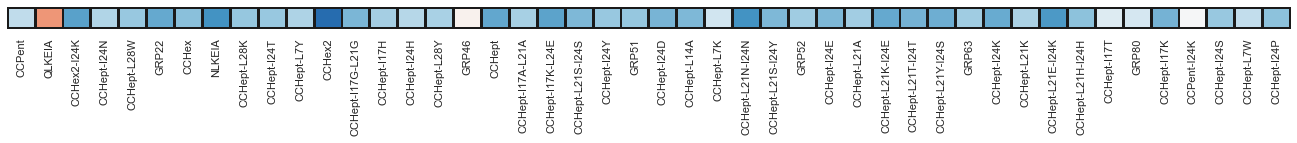

V


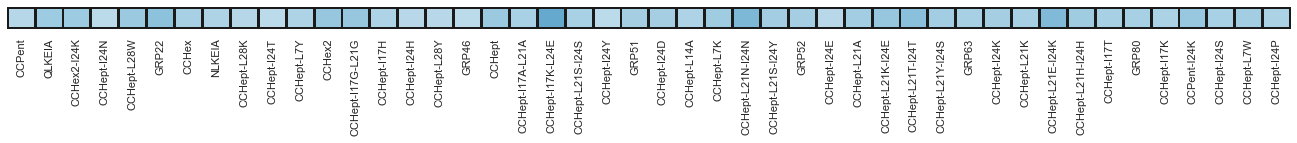

R


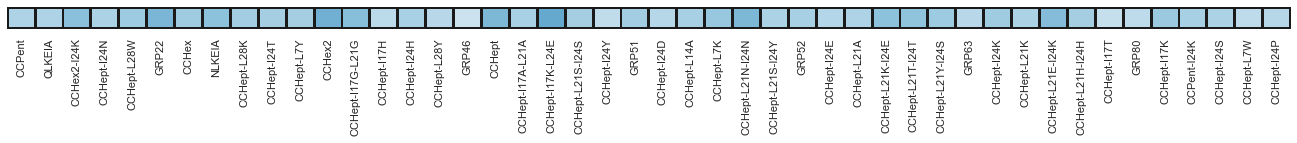

E


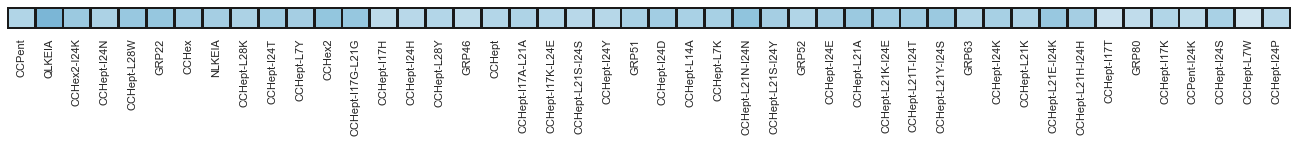

S


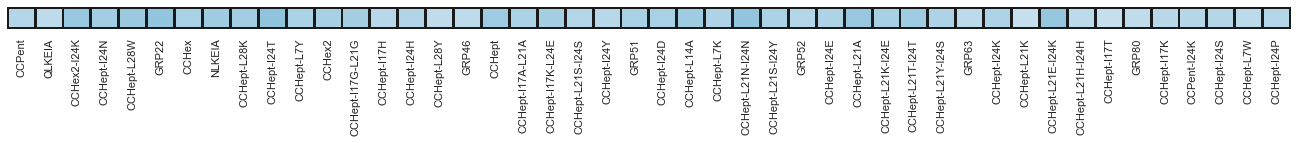

In [15]:
classes = []
for class_name in l_aa_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
l_aa_fluor_data_x_val = l_aa_fluor_data.drop(['Analyte'], axis=1)
vmin = l_aa_fluor_data_x_val.values.min()
vmax = l_aa_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(l_aa_fluor_data.shape[0])
                     if l_aa_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(l_aa_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(23,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=l_aa_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

W


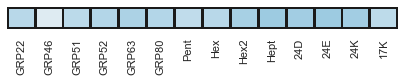

V


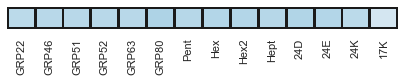

R


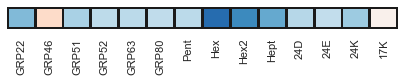

E


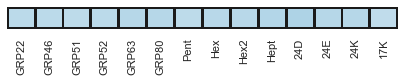

S


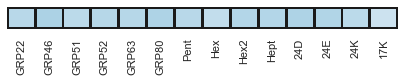

In [16]:
classes = []
for class_name in s_aa_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
s_aa_fluor_data_x_val = s_aa_fluor_data.drop(['Analyte'], axis=1)
vmin = s_aa_fluor_data_x_val.values.min()
vmax = s_aa_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(s_aa_fluor_data.shape[0])
                     if s_aa_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(s_aa_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(7,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=s_aa_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

Generates box plots to compare the distribution of values for each class across the 14 / 46 features

Glutamate


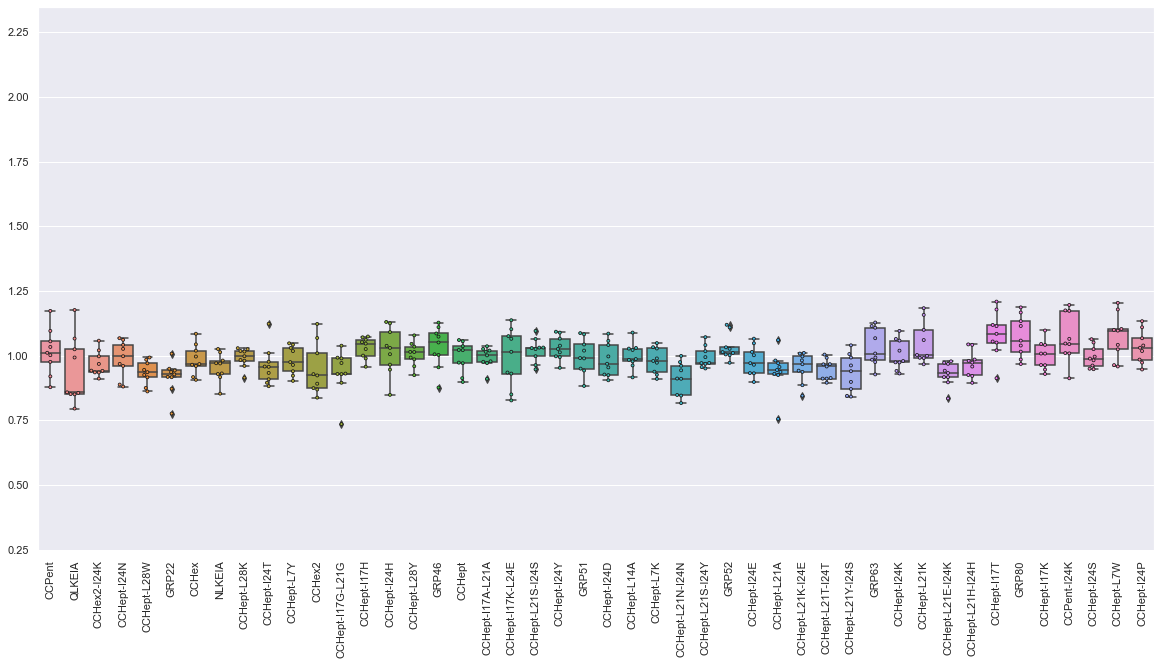

Arginine


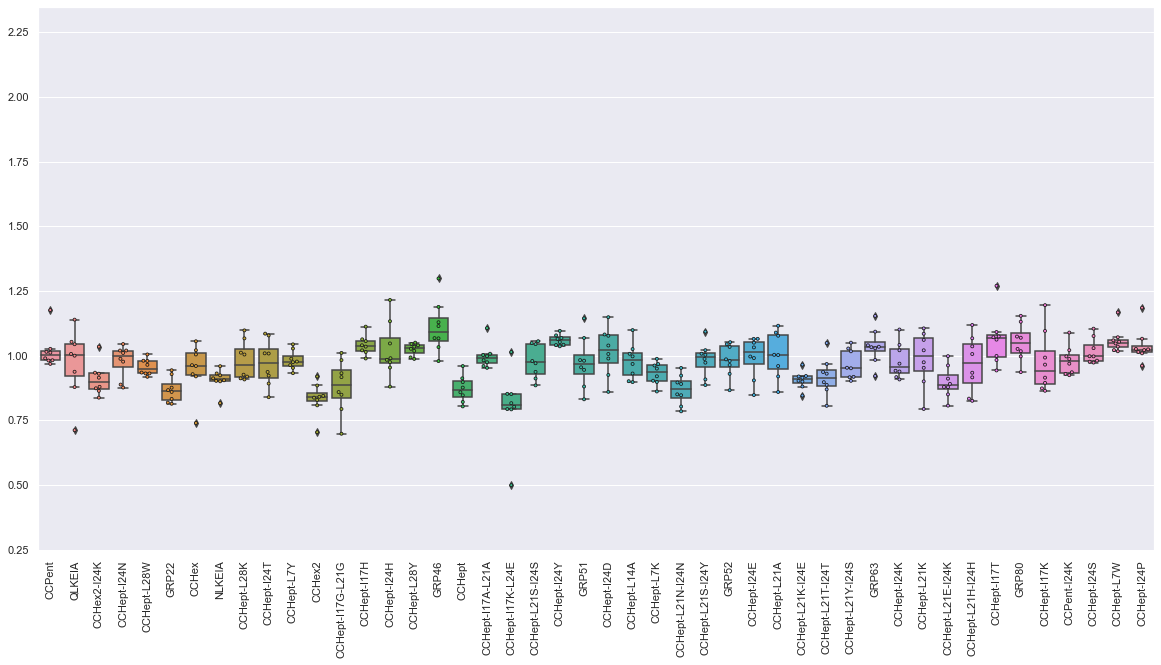

Serine


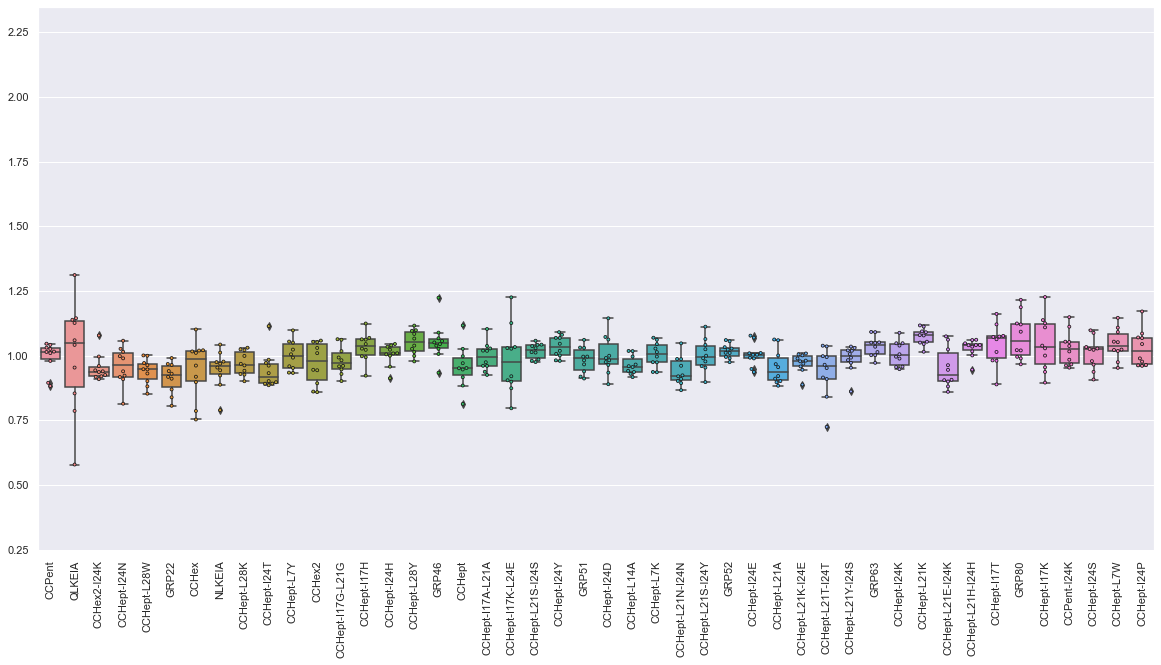

Tryptophan


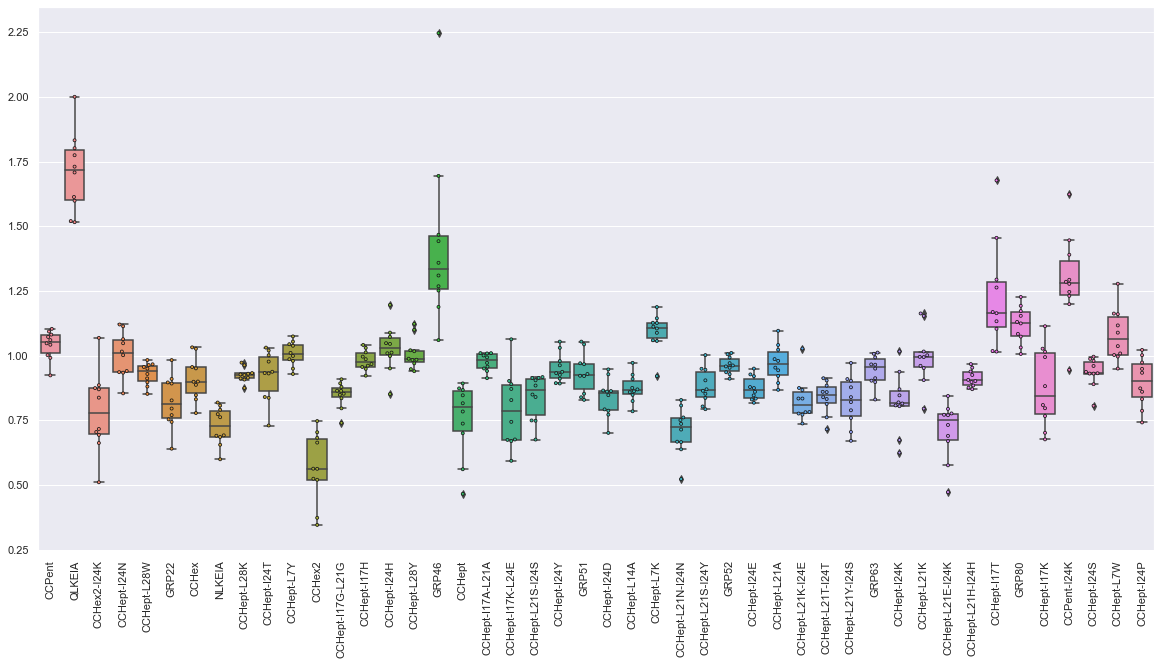

Valine


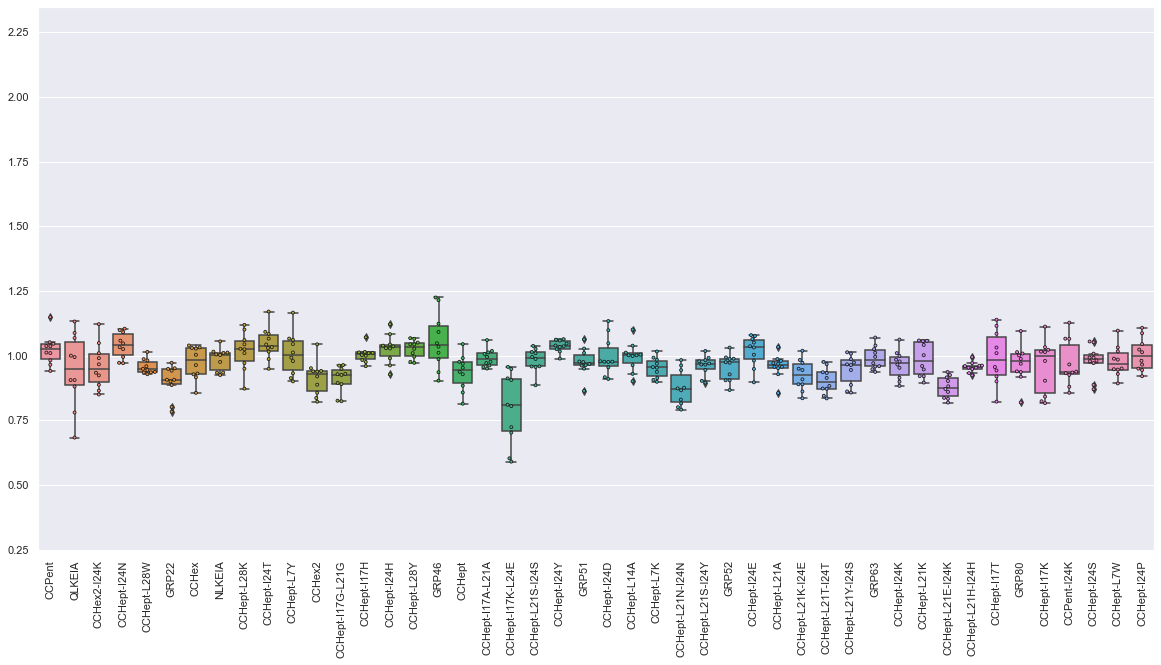

In [19]:
ymin = l_aa_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = l_aa_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

e_indices = [int(i) for i in range(l_aa_fluor_data.shape[0])
             if l_aa_fluor_data['Analyte'][i] == 'E']
r_indices = [int(i) for i in range(l_aa_fluor_data.shape[0])
             if l_aa_fluor_data['Analyte'][i] == 'R']
s_indices = [int(i) for i in range(l_aa_fluor_data.shape[0])
             if l_aa_fluor_data['Analyte'][i] == 'S']
w_indices = [int(i) for i in range(l_aa_fluor_data.shape[0])
             if l_aa_fluor_data['Analyte'][i] == 'W']
v_indices = [int(i) for i in range(l_aa_fluor_data.shape[0])
             if l_aa_fluor_data['Analyte'][i] == 'V']

sns.set(rc={'figure.figsize':(20,10)})
print('Glutamate')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_aa_fluor_data.iloc[e_indices])
sns.swarmplot(data=l_aa_fluor_data.iloc[e_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Arginine')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_aa_fluor_data.iloc[r_indices])
sns.swarmplot(data=l_aa_fluor_data.iloc[r_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Serine')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_aa_fluor_data.iloc[s_indices])
sns.swarmplot(data=l_aa_fluor_data.iloc[s_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Tryptophan')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_aa_fluor_data.iloc[w_indices])
sns.swarmplot(data=l_aa_fluor_data.iloc[w_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Valine')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_aa_fluor_data.iloc[v_indices])
sns.swarmplot(data=l_aa_fluor_data.iloc[v_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

Glutamate


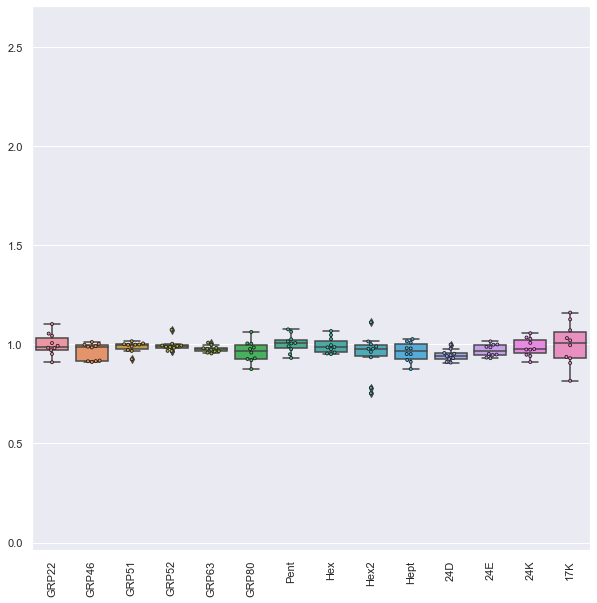

Arginine


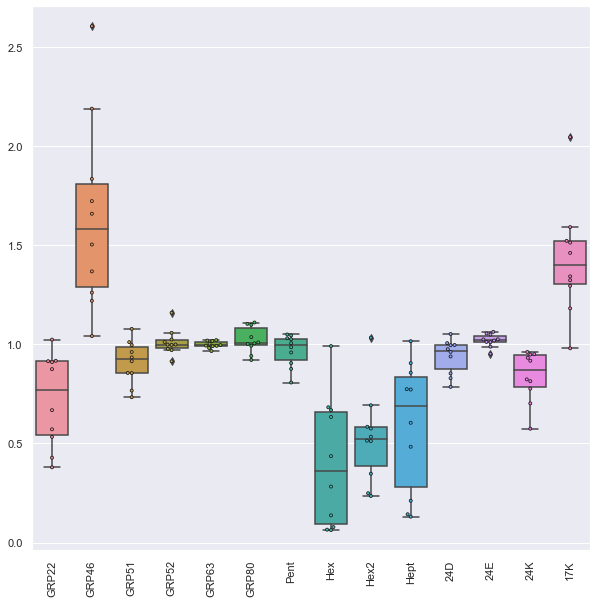

Serine


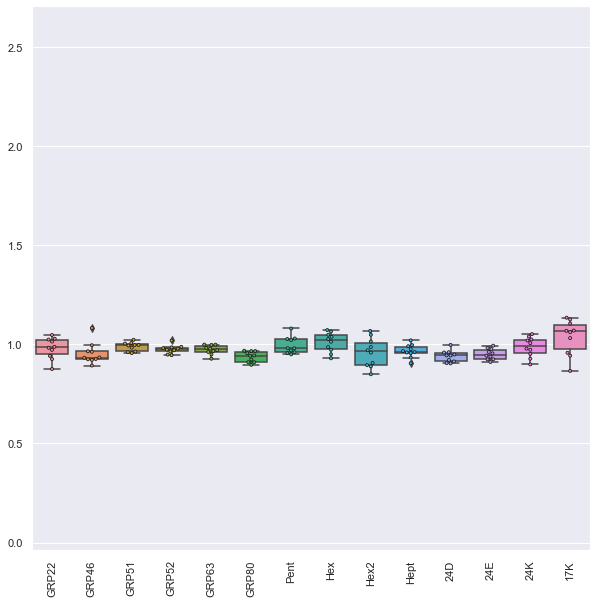

Tryptophan


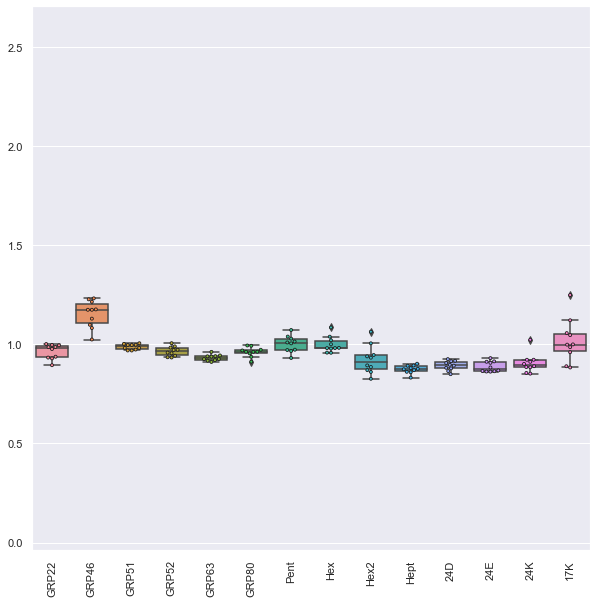

Valine


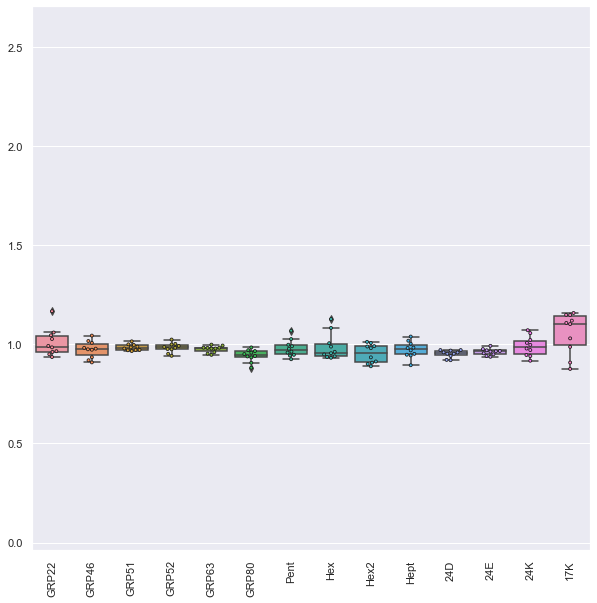

In [20]:
ymin = s_aa_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = s_aa_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

e_indices = [int(i) for i in range(s_aa_fluor_data.shape[0])
             if s_aa_fluor_data['Analyte'][i] == 'E']
r_indices = [int(i) for i in range(s_aa_fluor_data.shape[0])
             if s_aa_fluor_data['Analyte'][i] == 'R']
s_indices = [int(i) for i in range(s_aa_fluor_data.shape[0])
             if s_aa_fluor_data['Analyte'][i] == 'S']
w_indices = [int(i) for i in range(s_aa_fluor_data.shape[0])
             if s_aa_fluor_data['Analyte'][i] == 'W']
v_indices = [int(i) for i in range(s_aa_fluor_data.shape[0])
             if s_aa_fluor_data['Analyte'][i] == 'V']

sns.set(rc={'figure.figsize':(10,10)})
print('Glutamate')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_aa_fluor_data.iloc[e_indices])
sns.swarmplot(data=s_aa_fluor_data.iloc[e_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Arginine')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_aa_fluor_data.iloc[r_indices])
sns.swarmplot(data=s_aa_fluor_data.iloc[r_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Serine')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_aa_fluor_data.iloc[s_indices])
sns.swarmplot(data=s_aa_fluor_data.iloc[s_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Tryptophan')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_aa_fluor_data.iloc[w_indices])
sns.swarmplot(data=s_aa_fluor_data.iloc[w_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Valine')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_aa_fluor_data.iloc[v_indices])
sns.swarmplot(data=s_aa_fluor_data.iloc[v_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

#### Run machine learning

In [21]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

- Large array

First split the data into a training and test set

In [22]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/AAs/'
                'AAs_large_array_ML_results/', fluor_data=l_aa_fluor_data
)

Directory /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/AAs/AAs_large_array_ML_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/AAs/AAs_large_array_ML_results/?y


In [23]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 46 features

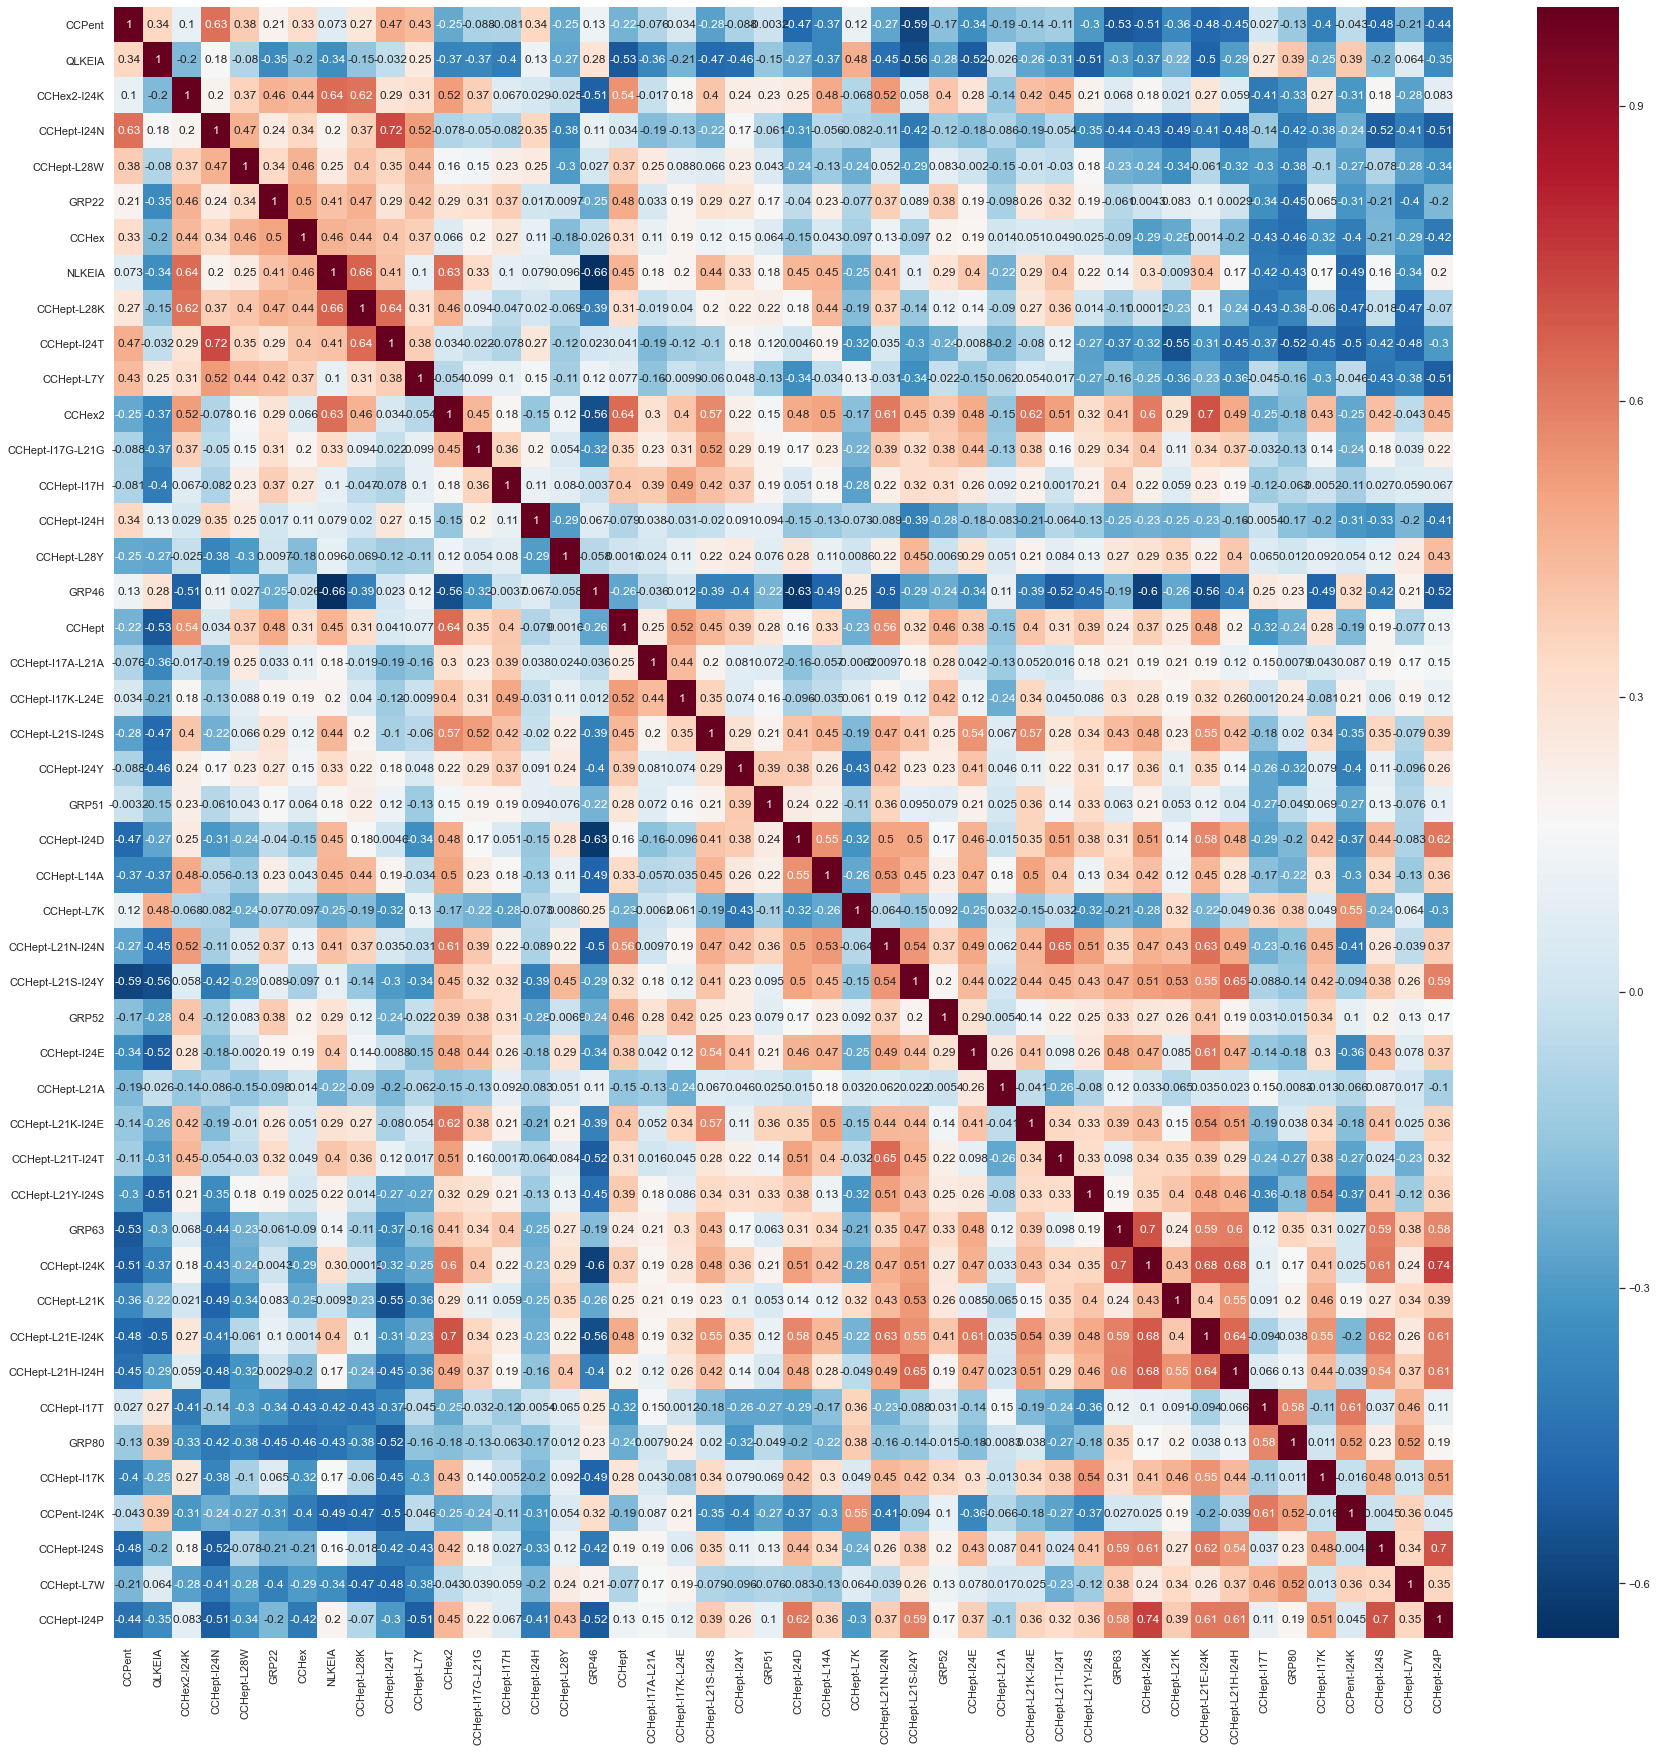

In [24]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
ml.calc_feature_correlations(train_data=ml.fluor_data)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

- Measure the relative importances of the initial 46 features

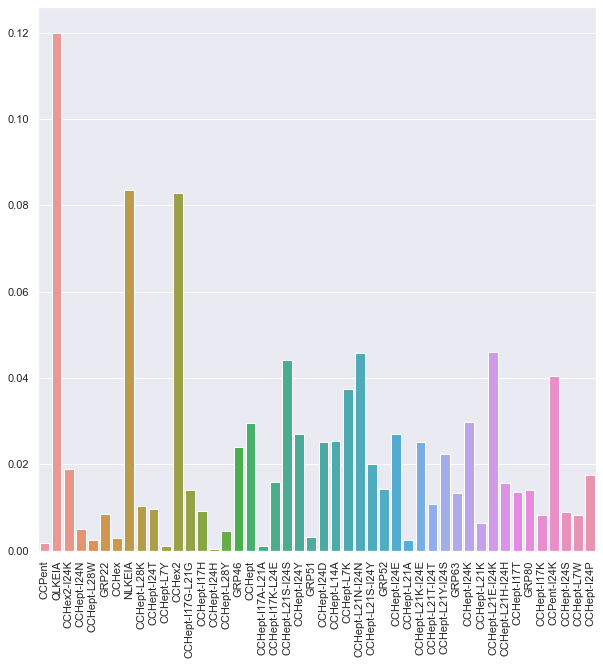

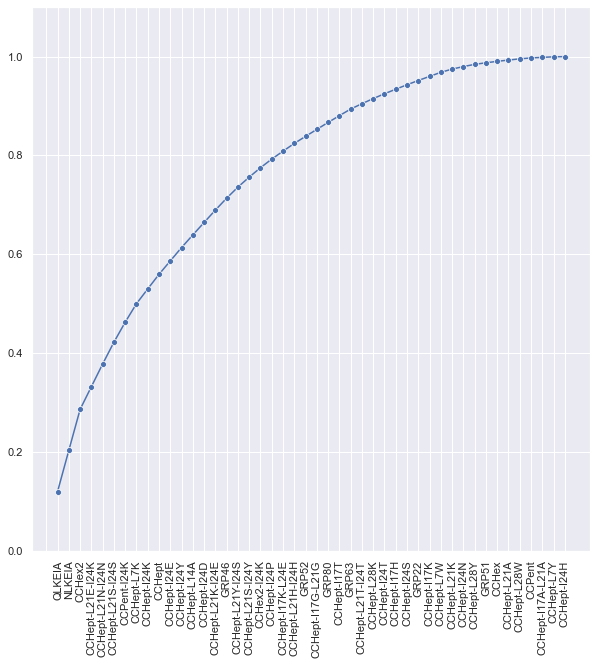

Feature     Score
0             QLKEIA  0.119888
1             NLKEIA  0.083498
2             CCHex2  0.082774
3   CCHept-L21E-I24K  0.046037
4   CCHept-L21N-I24N  0.045831
5   CCHept-L21S-I24S  0.044154
6        CCPent-I24K  0.040469
7         CCHept-L7K  0.037412
8        CCHept-I24K  0.029868
9             CCHept  0.029575
10       CCHept-I24E  0.027080
11       CCHept-I24Y  0.027054
12       CCHept-L14A  0.025534
13       CCHept-I24D  0.025211
14  CCHept-L21K-I24E  0.025080
15             GRP46  0.024112
16  CCHept-L21Y-I24S  0.022387
17  CCHept-L21S-I24Y  0.020187
18       CCHex2-I24K  0.018979
19       CCHept-I24P  0.017562
20  CCHept-I17K-L24E  0.015910
21  CCHept-L21H-I24H  0.015749
22             GRP52  0.014256
23  CCHept-I17G-L21G  0.014149
24             GRP80  0.014106
25       CCHept-I17T  0.013620
26             GRP63  0.013432
27  CCHept-L21T-I24T  0.010810
28       CCHept-L28K  0.010350
29       CCHept-I24T  0.009778
30       CCHept-I17H  0.009140
31       CCHept-I24S  0.009099
32             GRP22  0.008581
33       CCHept-I17K  0.008311
34        CCHept-L7W  0.008227
35       CCHept-L21K  0.006552
36       CCHept-I24N  0.005080
37       CCHept-L28Y  0.004488
38             GRP51  0.003162
39             CCHex  0.002944
40       CCHept-L21A  0.002576
41       CCHept-L28W  0.002508
42            CCPent  0.001811
43  CCHept-I17A-L21A  0.001158
44        CCHept-L7Y  0.001118
45       CCHept-I24H  0.000394

In [25]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

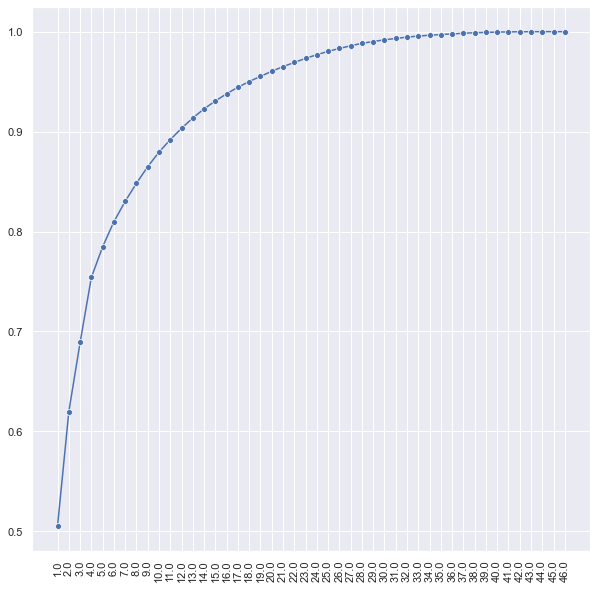

In [26]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 46 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [27]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 47)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [28]:
pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1          0.035570  0.609372    -0.153925     0.030217    -0.010772   
2         -0.105106  0.277163    -0.033090    -0.183361    -0.077103   
3         -0.142907 -0.532494    -0.319283    -0.132389    -0.083964   
4         -0.054517  0.168898     0.010989    -0.039715    -0.036544   
5          0.093297 -0.112263    -0.074904     0.121740    -0.023499   
6          0.005369  0.330611    -0.045744     0.058157     0.003686   
7          0.112923 -0.078196    -0.217851     0.005306    -0.032795   
8          0.077038  0.026635     0.115868     0.044802     0.093977   
9         -0.074345  0.093097     0.042701    -0.240646    -0.015381   
10        -0.091188 -0.015070     0.085133     0.049018     0.101319   
11        -0.027718 -0.136983     0.146510     0.113519     0.011396   
12        -0.300052  0.051494    -0.159651    -0.043704    -0.133457   
13         0.070718  0.096280    -0.165186     0.095446     0.161362   
14        -0.241411  0.060430     0.133174     0.011156     0.077400   
15        -0.213537 -0.001239    -0.000743    -0.091140     0.042004   
16         0.193062  0.033869    -0.138580     0.005795     0.041934   
17         0.136775  0.012206     0.029956    -0.198076     0.015072   
18         0.117415  0.066403    -0.366731     0.176845    -0.073435   
19         0.021998  0.046224     0.116620     0.028348     0.113378   
20        -0.170399 -0.032232     0.066180    -0.331447     0.125373   
21         0.084061 -0.046959     0.274892     0.054935     0.122918   
22         0.202609 -0.021506     0.123696     0.231385     0.108114   
23         0.121962  0.093032     0.060652    -0.262832     0.004789   
24        -0.102508 -0.003719     0.263921    -0.081919    -0.066663   
25        -0.012641  0.036654     0.002458     0.350174     0.129397   
26         0.085290  0.015503    -0.253355     0.041942     0.113816   
27         0.122112  0.009316    -0.128515    -0.077256     0.067745   
28         0.268902 -0.021439     0.191459    -0.059016    -0.118349   
29         0.326547  0.034462    -0.277832    -0.241587    -0.012720   
30        -0.199118  0.135183    -0.039575    -0.083333    -0.136507   
31         0.114171 -0.062238     0.029681     0.000912    -0.043825   
32         0.185162 -0.044690     0.050088    -0.076603    -0.106306   
33        -0.083281  0.063508     0.059666    -0.097361     0.017285   
34        -0.053623  0.044269     0.121821     0.117349    -0.253234   
35         0.005245 -0.048613     0.081627    -0.161336    -0.203469   
36        -0.061023  0.011209    -0.035438    -0.026012     0.358543   
37         0.041623 -0.029054     0.097852     0.030365    -0.224730   
38         0.135381  0.049327     0.106473     0.073691    -0.358818   
39         0.280878 -0.005797     0.092658    -0.281382    -0.184953   
40         0.014416 -0.017449    -0.158506    -0.078316     0.206226   
41        -0.336069 -0.008577    -0.173753     0.163142    -0.192464   
42        -0.157491  0.037397    -0.060077    -0.160508    -0.053129   
43         0.022801  0.022810    -0.179531    -0.068445    -0.274731   
44        -0.074559  0.068470     0.123799    -0.109679     0.047925   
45         0.063243  0.012494     0.034310    -0.080618     0.323819   
46        -0.042014 -0.034532    -0.061268    -0.312574     0.229023   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1         -0.076633 -0.032837 -0.174640    -0.048237    -0.023084  ...   
2         -0.043618 -0.163915 -0.070118    -0.097008    -0.253789  ...   
3         -0.185370 -0.182516 -0.209450    -0.154902    -0.143725  ...   
4         -0.066691 -0.160508  0.007001     0.034344    -0.022490  ...   
5          0.019906 -0.002853  0.137686     0.138475     0.280442  ...   
6         -0.209981 -0.161500  0.08497

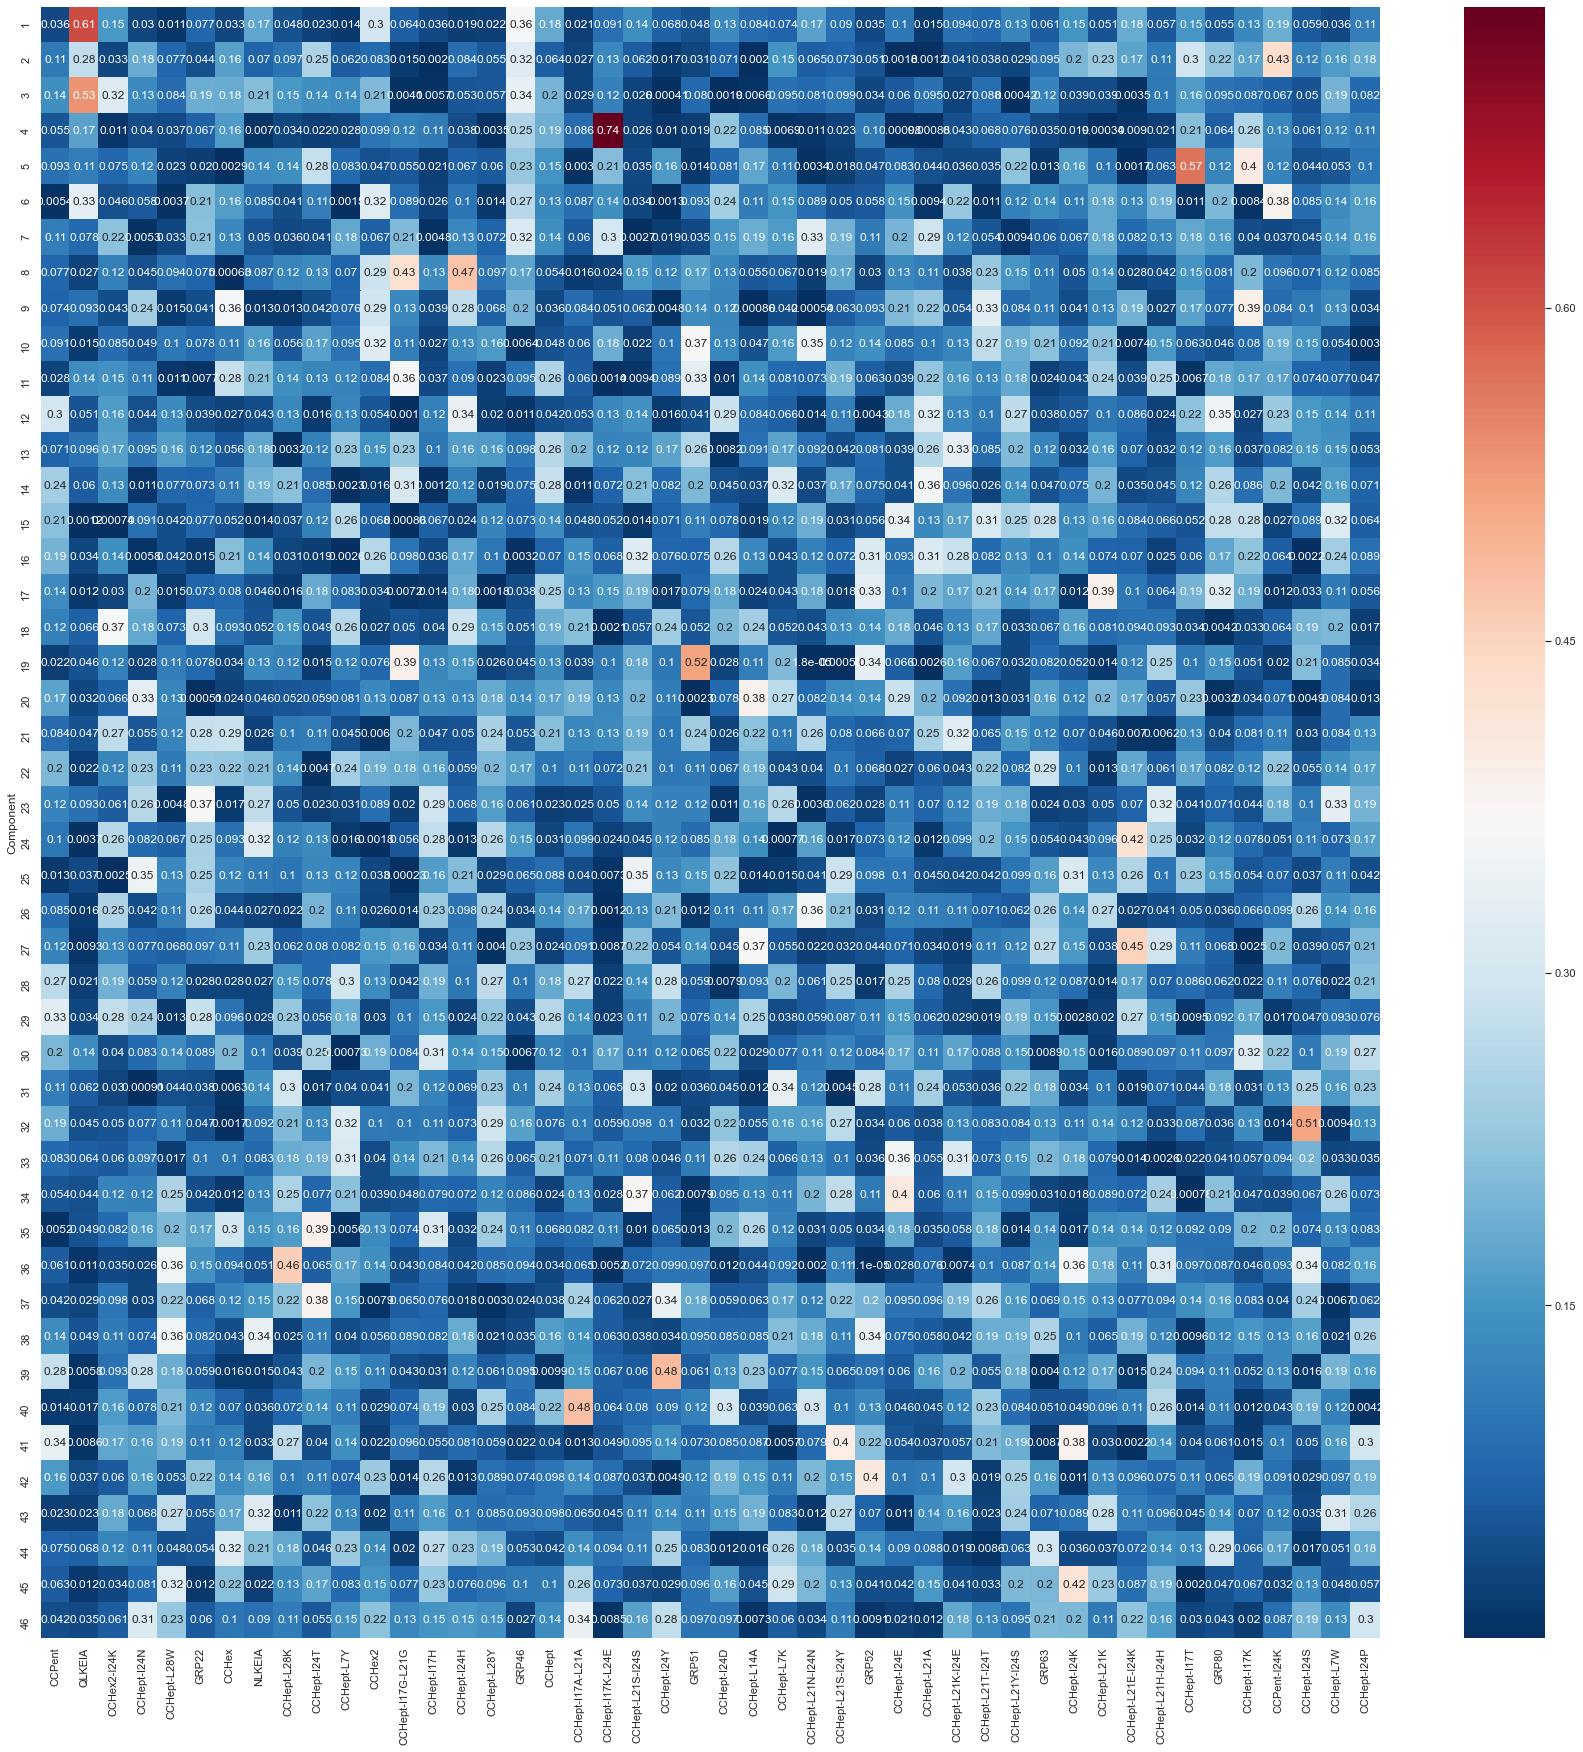

In [29]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

Relative contribution to the different components of each barrel

In [30]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [31]:
relative_pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1          0.006488  0.162094     0.027957     0.005676     0.002058   
2          0.019173  0.073726     0.006010     0.034444     0.014733   
3          0.026068  0.141645     0.057991     0.024869     0.016044   
4          0.009945  0.044927     0.001996     0.007460     0.006983   
5          0.017018  0.029862     0.013605     0.022868     0.004490   
6          0.000979  0.087943     0.008309     0.010925     0.000704   
7          0.020599  0.020800     0.039568     0.000997     0.006267   
8          0.014053  0.007085     0.021045     0.008416     0.017957   
9          0.013561  0.024764     0.007756     0.045205     0.002939   
10         0.016634  0.004009     0.015463     0.009208     0.019360   
11         0.005056  0.036438     0.026610     0.021324     0.002178   
12         0.054733  0.013698     0.028997     0.008210     0.025501   
13         0.012900  0.025611     0.030003     0.017929     0.030833   
14         0.044036  0.016074     0.024188     0.002096     0.014790   
15         0.038952  0.000330     0.000135     0.017120     0.008026   
16         0.035217  0.009009     0.025170     0.001089     0.008013   
17         0.024949  0.003247     0.005441     0.037208     0.002880   
18         0.021418  0.017663     0.066609     0.033220     0.014032   
19         0.004013  0.012296     0.021182     0.005325     0.021665   
20         0.031083  0.008574     0.012020     0.062261     0.023957   
21         0.015334  0.012491     0.049928     0.010319     0.023487   
22         0.036958  0.005721     0.022467     0.043465     0.020659   
23         0.022247  0.024747     0.011016     0.049372     0.000915   
24         0.018699  0.000989     0.047936     0.015388     0.012738   
25         0.002306  0.009750     0.000446     0.065779     0.024726   
26         0.015558  0.004124     0.046017     0.007879     0.021748   
27         0.022275  0.002478     0.023342     0.014512     0.012945   
28         0.049051  0.005703     0.034775     0.011086     0.022614   
29         0.059566  0.009167     0.050462     0.045381     0.002431   
30         0.036322  0.035959     0.007188     0.015654     0.026084   
31         0.020826  0.016555     0.005391     0.000171     0.008374   
32         0.033776  0.011888     0.009097     0.014390     0.020313   
33         0.015192  0.016893     0.010837     0.018289     0.003303   
34         0.009782  0.011776     0.022126     0.022044     0.048388   
35         0.000957  0.012931     0.014826     0.030306     0.038879   
36         0.011131  0.002982     0.006437     0.004886     0.068511   
37         0.007592  0.007729     0.017773     0.005704     0.042942   
38         0.024695  0.013121     0.019339     0.013843     0.068564   
39         0.051236  0.001542     0.016829     0.052857     0.035341   
40         0.002630  0.004641     0.028789     0.014711     0.039406   
41         0.061303  0.002282     0.031559     0.030646     0.036776   
42         0.028728  0.009948     0.010912     0.030151     0.010152   
43         0.004159  0.006068     0.032608     0.012857     0.052496   
44         0.013600  0.018213     0.022486     0.020603     0.009158   
45         0.011536  0.003323     0.006232     0.015144     0.061876   
46         0.007664  0.009186     0.011128     0.058716     0.043762   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1          0.014445  0.006180  0.032204     0.009007     0.004281  ...   
2          0.008222  0.030848  0.012930     0.018113     0.047069  ...   
3          0.034941  0.034349  0.038622     0.028923     0.026656  ...   
4          0.012571  0.030207  0.001291     0.006413     0.004171  ...   
5          0.003752  0.000537  0.025389     0.025856     0.052012  ...   
6          0.039580  0.030394  0.01567

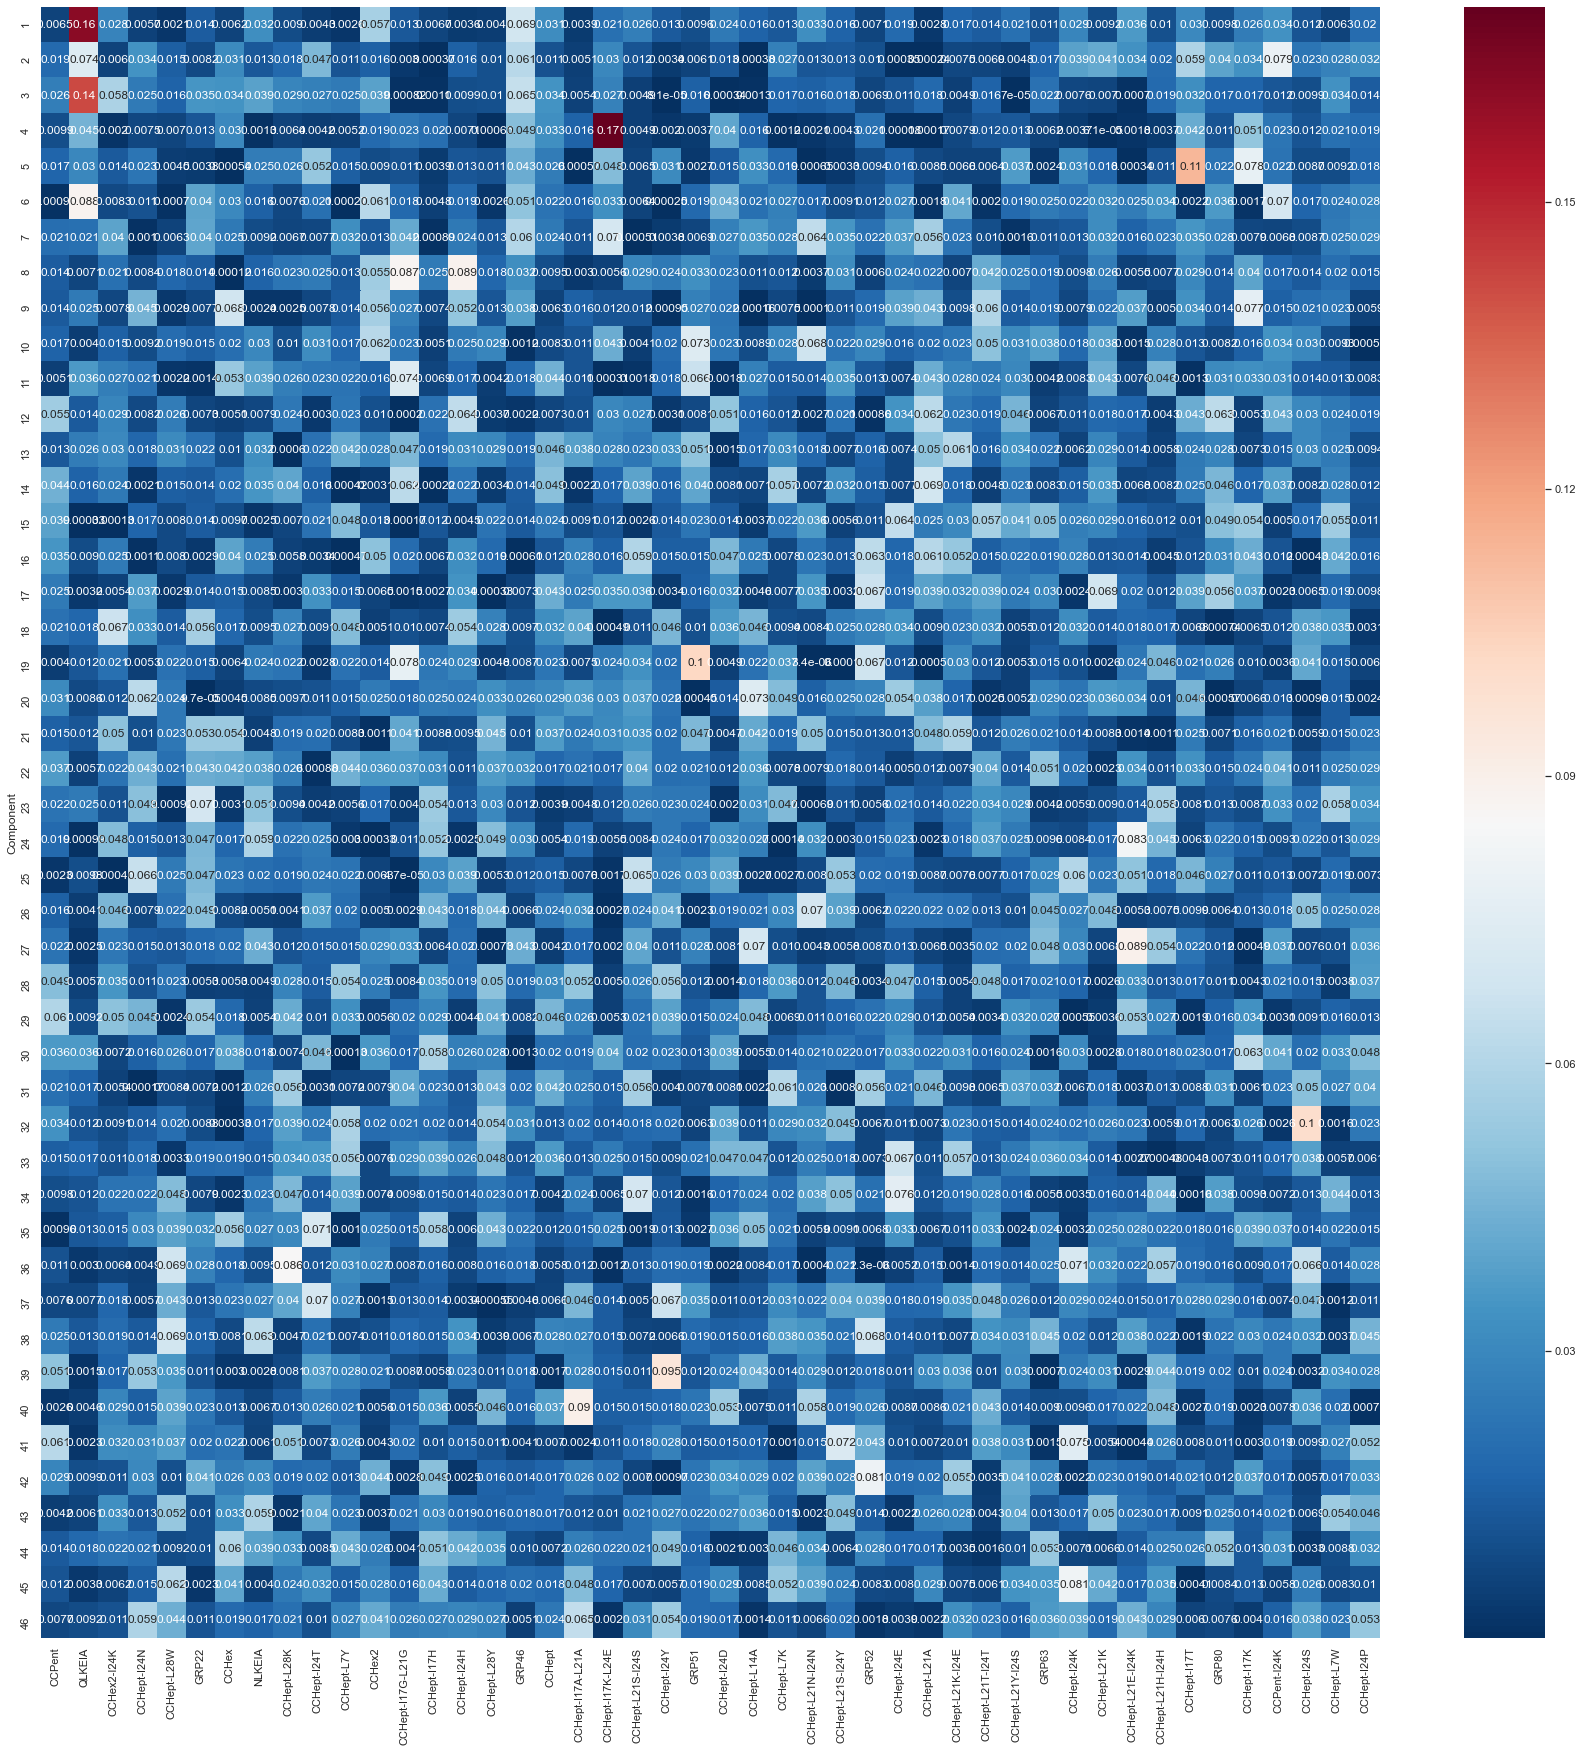

In [32]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

In [33]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    random.shuffle(extra_colours)
    colours += extra_colours
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            cat_colours[cat] = current_colour
            marker_count = 0
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

Scatter plots of data transformed to PCA dimensions

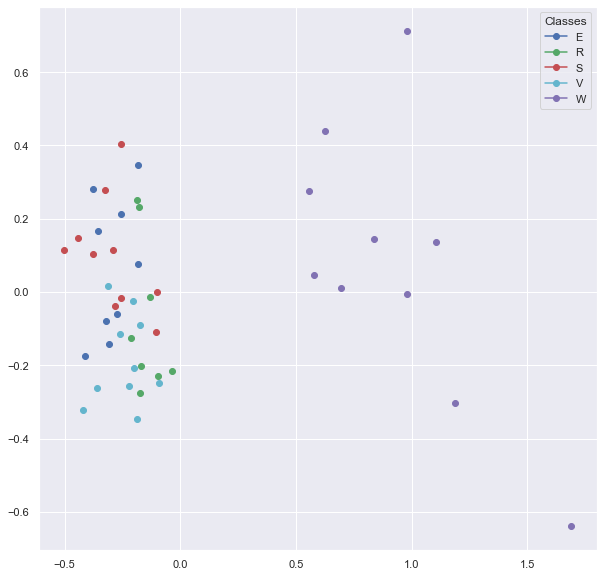

In [34]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['E', 'R', 'S', 'V', 'W'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

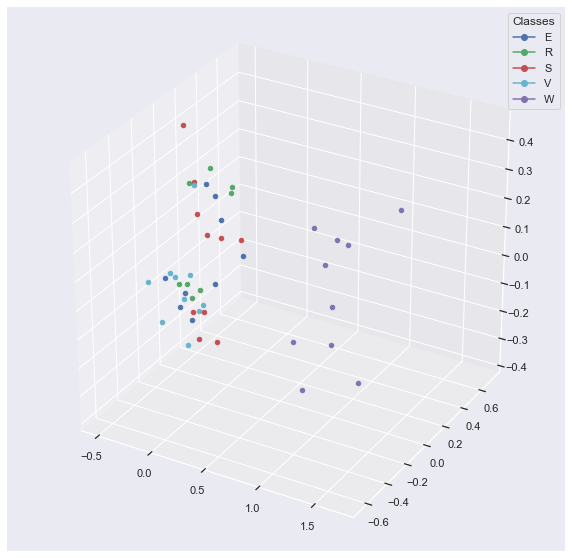

In [35]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['E', 'R', 'S', 'V', 'W'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

95% of the data is explained by ~18 features => won't perform any PCA. (Unfortunately because n_features > n_samples, can't perform PCA with 46 features to ensure that all features are orthogonal.)

In [36]:
n_components = None

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [37]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 10000.0}
Best score: 0.525






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 10000.0}
Best score: 0.525
All parameter combinations tested:
1 {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 1000.0} nan
2 {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 31622.776601683792} 0.421
3 {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 3.1622

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.03125}
Best score: 0.5035714285714286
Range tested: [3.12500000e-02 4.41941738e-02 6.25000000e-02 8.83883476e-02
 1.25000000e-01 1.76776695e-01 2.50000000e-01 3.53553391e-01
 5.00000000e-01 7.07106781e-01 1.00000000e+00 1.41421356e+00
 2.00000000e+00 2.82842712e+00 4.00000000e+00 5.65685425e+00
 8.00000000e+00 1.13137085e+01 1.60000000e+01 2.26274170e+01
 3.20000000e+01 4.52548340e+01 6.40000000e+01 9.05096680e+01
 1.28000000e+02 1.81019336e+02 2.56000000e+02 3.62038672e+02
 5.12000000e+02 7.24077344e+02 1.02400000e+03 1.44815469e+03
 2.04800000e+03 2.89630938e+03 4.09600000e+03 5.79261875e+03
 8.19200000e+03 1.15852375e+04 1.63840000e+04 2.31704750e+04
 3.27680000e+04]
Value selected: 0.03125






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 0.03125}
Best score: 0.5035714285714286
All parameter combinations tested:
1 {'LinearSVC__C': 16384.0} 0.425
2 {'LinearSVC__C': 90.50966799187809} 0

In [38]:
score_df

Algorithm Resampling_method  \
0    LogisticRegression      no_balancing   
1  KNeighborsClassifier      no_balancing   
2            GaussianNB      no_balancing   
3             LinearSVC      no_balancing   
4                   SVC      no_balancing   

                                         Best_params  Best_accuracy_score  \
0  {'LogisticRegression__solver': 'lbfgs', 'Logis...             0.525000   
1  {'KNeighborsClassifier__weights': 'uniform', '...             0.492857   
2                                                 {}             0.417857   
3                          {'LinearSVC__C': 0.03125}             0.503571   
4  {'SVC__gamma': 0.00017263349150062197, 'SVC__C...             0.575000   

   Mean_accuracy_score  Std_dev_accuracy_score  
0             0.384962                0.096876  
1             0.397173                0.158035  
2             0.417857                0.138136  
3             0.444571                0.092379  
4             0.320857                0.111852

So, from this spot check, a **support vector classifier with radial basis function kernel** does a good job.

So, run hyperparameter optimisation for SVC.

In [44]:
fixed_params = ml.define_fixed_model_params(clf=SVC())
random_tuned_params = ml.define_tuned_model_params(clf=SVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.00048828125, 'SVC__C': 256.0}
Best score: 0.5785714285714285


In [45]:
grid_tuned_params = {'C': np.linspace(2, 400, 200),
                     'gamma': np.linspace(0.00005, 0.005, 100)}

svc_grid_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'SVC__C': 4.0, 'SVC__gamma': 0.00335}
Best score: 0.6071428571428571


### So, optimal hyperparameter combination:
- C = 4
- gamma = 0.00335

Model cross-validation score: [0.75       0.5        0.5        0.42857143 0.57142857]
accuracy_score: 0.6666666666666666
recall_score: 0.6
precision_score: 0.4333333333333333
f1_score: 0.49333333333333335
cohen_kappa_score: 0.5714285714285714
None


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


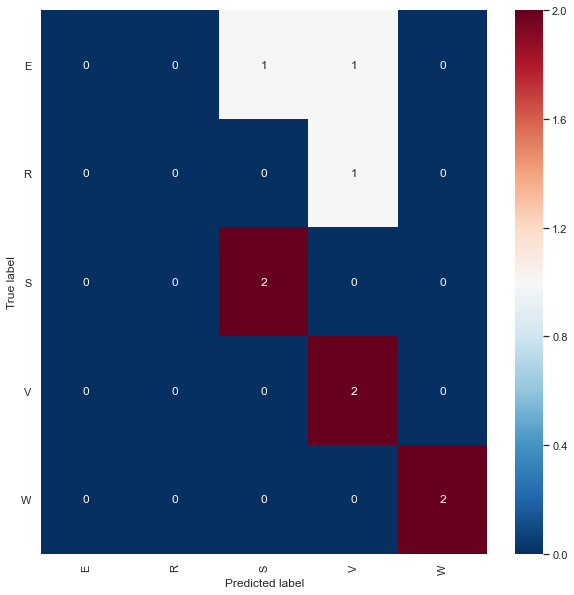

true


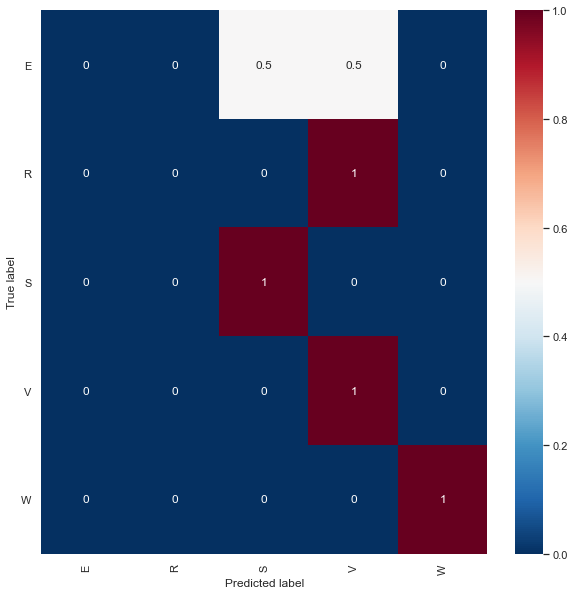

pred


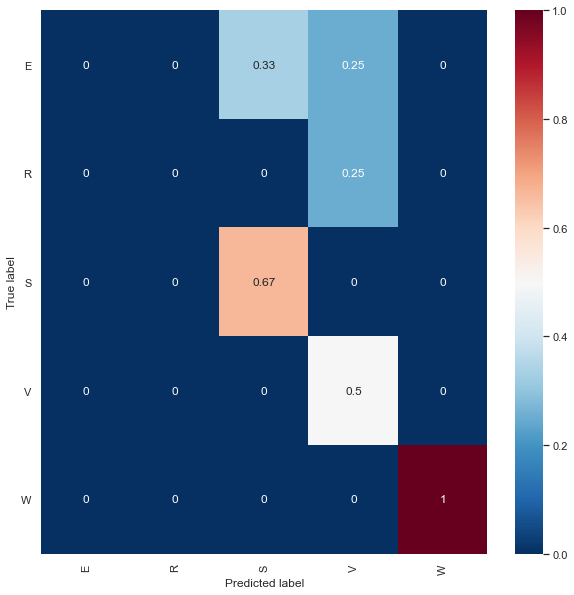

In [47]:
final_params = {'C': 4,
                'gamma': 0.0035}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

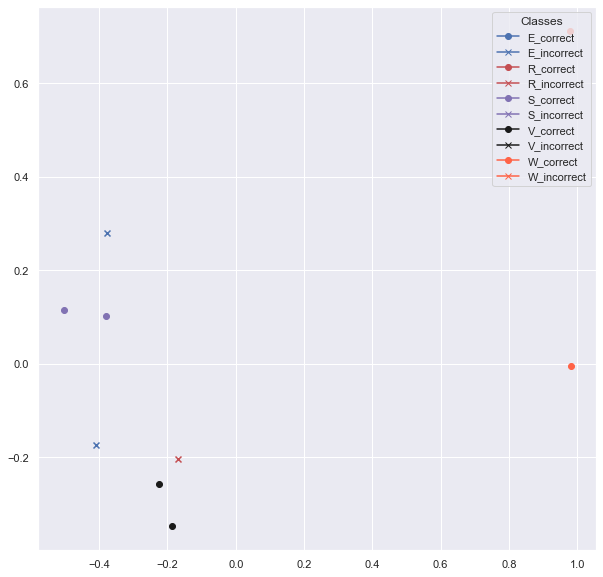

In [48]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['E_correct', 'E_incorrect', 'R_correct', 'R_incorrect', 'S_correct', 'S_incorrect', 'V_correct',
                'V_incorrect', 'W_correct', 'W_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

- Standard array

In [49]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

First split the data into a training and test set

In [50]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/AAs/'
                'AAs_standard_array_ML_results/', fluor_data=s_aa_fluor_data
)

Directory /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/AAs/AAs_standard_array_ML_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/AAs/AAs_standard_array_ML_results/?y


In [51]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 14 features

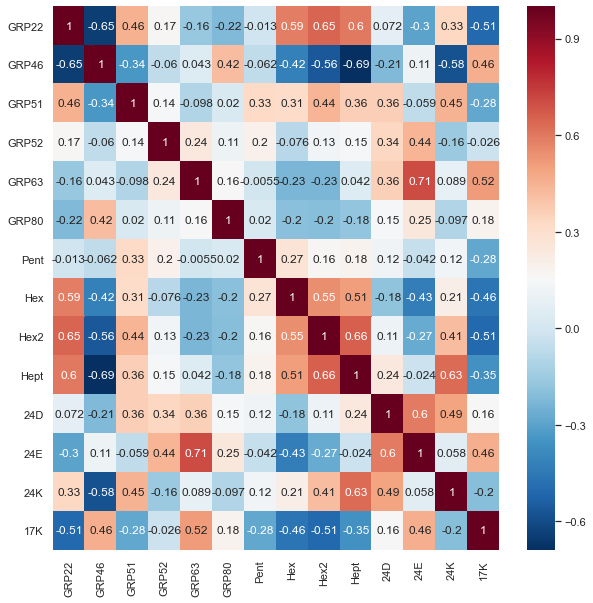

GRP22     GRP46     GRP51     GRP52     GRP63     GRP80      Pent  \
GRP22  1.000000 -0.648307  0.458343  0.166963 -0.164370 -0.218535 -0.012629   
GRP46 -0.648307  1.000000 -0.336086 -0.059592  0.042785  0.415414 -0.061609   
GRP51  0.458343 -0.336086  1.000000  0.142953 -0.098103  0.020408  0.325618   
GRP52  0.166963 -0.059592  0.142953  1.000000  0.243697  0.109916  0.200960   
GRP63 -0.164370  0.042785 -0.098103  0.243697  1.000000  0.156975 -0.005522   
GRP80 -0.218535  0.415414  0.020408  0.109916  0.156975  1.000000  0.020312   
Pent  -0.012629 -0.061609  0.325618  0.200960 -0.005522  0.020312  1.000000   
Hex    0.590300 -0.422425  0.314862 -0.075822 -0.231885 -0.200288  0.274334   
Hex2   0.648980 -0.563025  0.440288  0.127395 -0.232557 -0.201825  0.162449   
Hept   0.599424 -0.688739  0.362977  0.145354  0.041825 -0.179256  0.184346   
24D    0.071789 -0.214502  0.362017  0.339256  0.358848  0.146411  0.119520   
24E   -0.298247  0.114814 -0.059016  0.442881  0.705546  0.254550 -0.042497   
24K    0.331188 -0.578391  0.446146 -0.156879  0.089364 -0.097047  0.123073   
17K   -0.506651  0.460648 -0.282497 -0.025786  0.516351  0.183770 -0.284802   

            Hex      Hex2      Hept       24D       24E       24K       17K  
GRP22  0.590300  0.648980  0.599424  0.071789 -0.298247  0.331188 -0.506651  
GRP46 -0.422425 -0.563025 -0.688739 -0.214502  0.114814 -0.578391  0.460648  
GRP51  0.314862  0.440288  0.362977  0.362017 -0.059016  0.446146 -0.282497  
GRP52 -0.075822  0.127395  0.145354  0.339256  0.442881 -0.156879 -0.025786  
GRP63 -0.231885 -0.232557  0.041825  0.358848  0.705546  0.089364  0.516351  
GRP80 -0.200288 -0.201825 -0.179256  0.146411  0.254550 -0.097047  0.183770  
Pent   0.274334  0.162449  0.184346  0.119520 -0.042497  0.123073 -0.284802  
Hex    1.000000  0.547851  0.505978 -0.184826 -0.430396  0.213445 -0.462473  
Hex2   0.547851  1.000000  0.658583  0.105210 -0.268571  0.414838 -0.509724  
Hept   0.505978  0.658583  1.000000  0.244562 -0.024058  0.634190 -0.354814  
24D   -0.184826  0.105210  0.244562  1.000000  0.596639  0.493493  0.159376  
24E   -0.430396 -0.268571 -0.024058  0.596639  1.000000  0.057863  0.460648  
24K    0.213445  0.414838  0.634190  0.493493  0.057863  1.000000 -0.201729  
17K   -0.462473 -0.509724 -0.354814  0.159376  0.460648 -0.201729  1.000000

In [52]:
ml.calc_feature_correlations(train_data=ml.fluor_data)

- Measure the relative importances of the initial 14 features

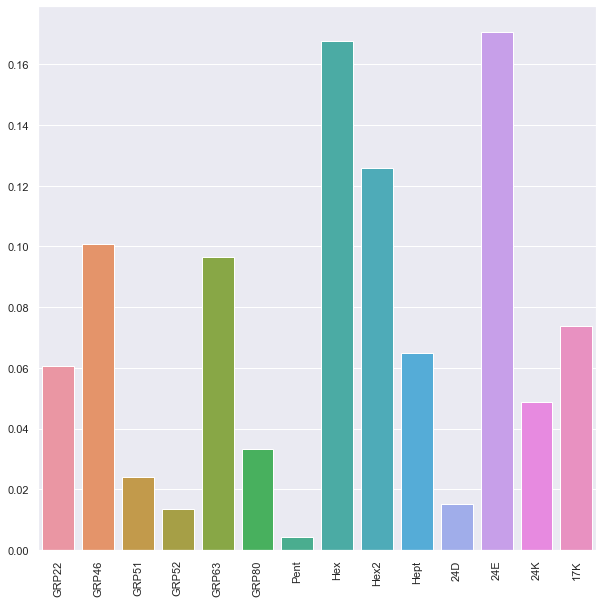

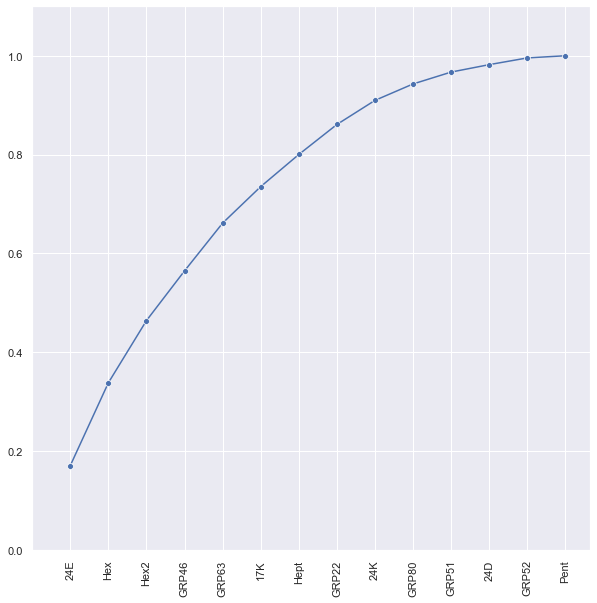

Feature     Score
0      24E  0.170590
1      Hex  0.167665
2     Hex2  0.125853
3    GRP46  0.100654
4    GRP63  0.096639
5      17K  0.073790
6     Hept  0.065009
7    GRP22  0.060737
8      24K  0.048775
9    GRP80  0.033217
10   GRP51  0.024053
11     24D  0.015036
12   GRP52  0.013596
13    Pent  0.004385

In [53]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

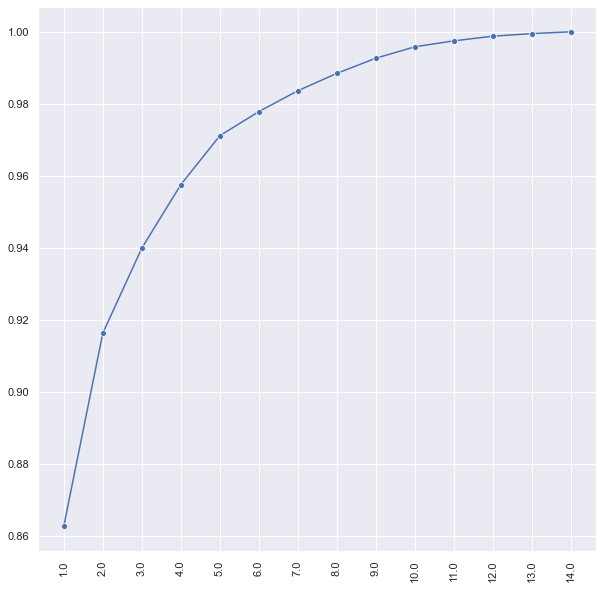

In [54]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 14 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [55]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 15)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [56]:
pca_components

GRP22     GRP46     GRP51     GRP52     GRP63     GRP80  \
Component                                                               
1         -0.256889  0.572256 -0.087978 -0.000993  0.016217  0.035814   
2         -0.036619  0.518380 -0.070612 -0.078828 -0.075231 -0.009222   
3         -0.065990  0.216761 -0.040657 -0.110715 -0.063215 -0.149208   
4          0.342889  0.514665  0.194566  0.052309  0.080844  0.349233   
5          0.091319 -0.071005 -0.036566 -0.218034  0.008603 -0.113675   
6          0.770857 -0.063930  0.032781  0.171619 -0.053765 -0.068269   
7         -0.156796 -0.208321  0.107649  0.300014 -0.044433  0.191512   
8         -0.055592  0.072462 -0.006998  0.469711  0.280349 -0.056781   
9         -0.077956  0.037587 -0.262672 -0.118707  0.176209 -0.627236   
10         0.229294  0.146558  0.299520 -0.071553 -0.178832 -0.564392   
11        -0.214112  0.071835  0.448641  0.569807 -0.316883 -0.260065   
12         0.254292  0.061303 -0.258397  0.267953  0.343013 -0.065858   
13         0.031671  0.046486 -0.710369  0.377130 -0.400588 -0.020994   
14         0.101685 -0.013823 -0.048327 -0.182334 -0.677079  0.112012   

               Pent       Hex      Hex2      Hept       24D       24E  \
Component                                                               
1         -0.048067 -0.477280 -0.342742 -0.348640 -0.027149  0.041489   
2          0.010639  0.254155  0.127080 -0.145320 -0.185253 -0.170478   
3         -0.174870  0.549473  0.306565 -0.019833 -0.246993 -0.195708   
4          0.184631  0.047818 -0.022410  0.594970  0.170011  0.083335   
5          0.025363  0.431132 -0.853616  0.045025  0.007726 -0.084117   
6         -0.329646 -0.162896 -0.035621 -0.179834 -0.051801 -0.078491   
7          0.606155 -0.008121 -0.063432  0.063288 -0.245243 -0.191864   
8          0.021716  0.383737  0.005166 -0.258491  0.287304  0.607869   
9          0.005626 -0.201152  0.021529  0.513918 -0.109570  0.255422   
10         0.532659 -0.022312  0.090504 -0.255321  0.271077 -0.103771   
11        -0.323608 -0.017208 -0.163171  0.218099 -0.189381 -0.096682   
12         0.221655 -0.018925 -0.047327 -0.099506 -0.631076  0.015385   
13         0.070302  0.040354 -0.016074  0.101322  0.326343 -0.234416   
14         0.114679  0.020707 -0.011743 -0.026891 -0.321705  0.603219   

                24K       17K  
Component                      
1         -0.128582  0.330340  
2         -0.265510 -0.690756  
3         -0.109537  0.608530  
4          0.083180  0.121740  
5         -0.016689 -0.011318  
6         -0.427211  0.058730  
7         -0.553012  0.116070  
8         -0.150126  0.002153  
9         -0.319213 -0.027114  
10         0.189618  0.052773  
11         0.155468 -0.079969  
12         0.459110 -0.010461  
13         0.097780  0.031100  
14         0.023241  0.023582

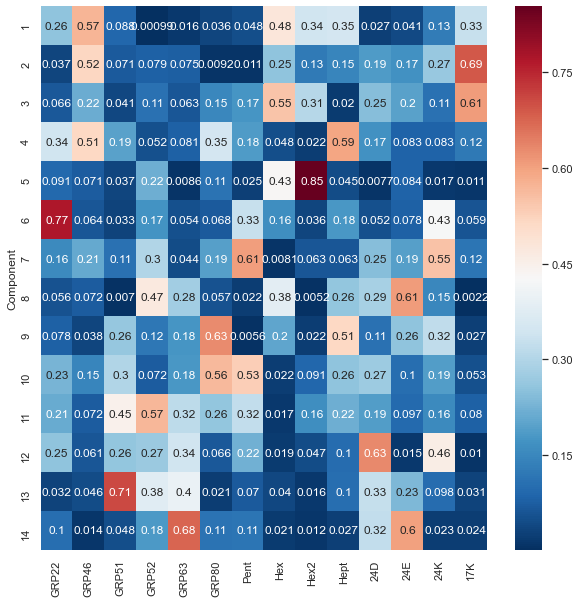

In [57]:
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Relative contribution to the different components of each barrel

In [58]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [59]:
relative_pca_components

GRP22     GRP46     GRP51     GRP52     GRP63     GRP80  \
Component                                                               
1          0.095642  0.218805  0.033763  0.000332  0.005972  0.013647   
2          0.013634  0.198205  0.027099  0.026366  0.027707  0.003514   
3          0.024568  0.082880  0.015603  0.037032  0.023281  0.056857   
4          0.127660  0.196785  0.074669  0.017496  0.029774  0.133078   
5          0.033999  0.027149  0.014033  0.072928  0.003168  0.043317   
6          0.286995  0.024444  0.012580  0.057403  0.019801  0.026014   
7          0.058376  0.079652  0.041312  0.100349  0.016364  0.072977   
8          0.020697  0.027706  0.002686  0.157110  0.103249  0.021637   
9          0.029024  0.014372  0.100805  0.039705  0.064896  0.239013   
10         0.085368  0.056037  0.114947  0.023933  0.065862  0.215066   
11         0.079715  0.027466  0.172175  0.190590  0.116705  0.099100   
12         0.094674  0.023439  0.099165  0.089625  0.126328  0.025096   
13         0.011791  0.017774  0.272618  0.126143  0.147532  0.008000   
14         0.037858  0.005285  0.018546  0.060987  0.249361  0.042683   

               Pent       Hex      Hex2      Hept       24D       24E  \
Component                                                               
1          0.018005  0.181112  0.162670  0.121458  0.008841  0.015020   
2          0.003985  0.096444  0.060314  0.050626  0.060331  0.061717   
3          0.065504  0.208507  0.145499  0.006909  0.080437  0.070851   
4          0.069160  0.018145  0.010636  0.207273  0.055367  0.030169   
5          0.009500  0.163601  0.405137  0.015686  0.002516  0.030452   
6          0.123481  0.061814  0.016906  0.062650  0.016870  0.028416   
7          0.227057  0.003082  0.030105  0.022048  0.079867  0.069459   
8          0.008134  0.145616  0.002452  0.090052  0.093565  0.220063   
9          0.002107  0.076331  0.010218  0.179037  0.035683  0.092469   
10         0.199527  0.008467  0.042954  0.088948  0.088281  0.037568   
11         0.121219  0.006530  0.077443  0.075981  0.061675  0.035001   
12         0.083029  0.007181  0.022462  0.034666  0.205520  0.005570   
13         0.026334  0.015313  0.007629  0.035298  0.106279  0.084864   
14         0.042957  0.007858  0.005574  0.009368  0.104768  0.218380   

                24K       17K  
Component                      
1          0.043173  0.152607  
2          0.089149  0.319110  
3          0.036778  0.281124  
4          0.027929  0.056241  
5          0.005604  0.005229  
6          0.143442  0.027131  
7          0.185682  0.053621  
8          0.050407  0.000995  
9          0.107181  0.012526  
10         0.063667  0.024380  
11         0.052201  0.036943  
12         0.154153  0.004833  
13         0.032831  0.014367  
14         0.007804  0.010894

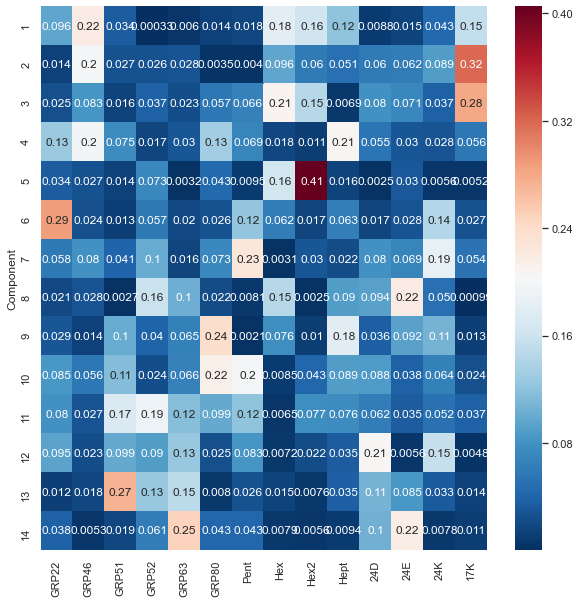

In [60]:
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Scatter plots of data transformed to PCA dimensions

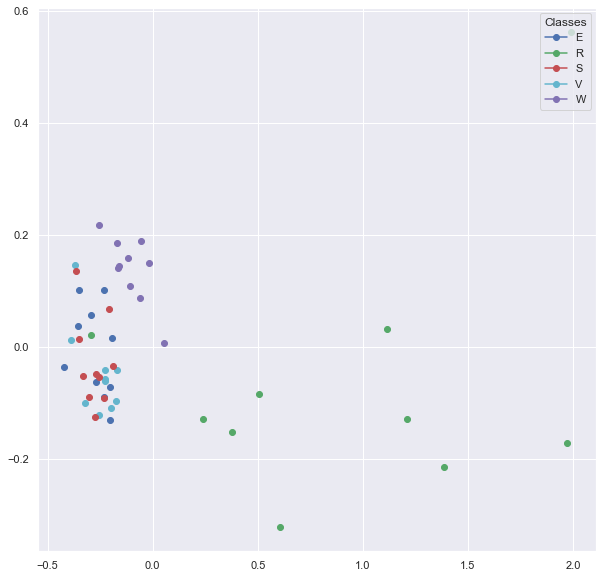

In [61]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['E', 'R', 'S', 'V', 'W'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

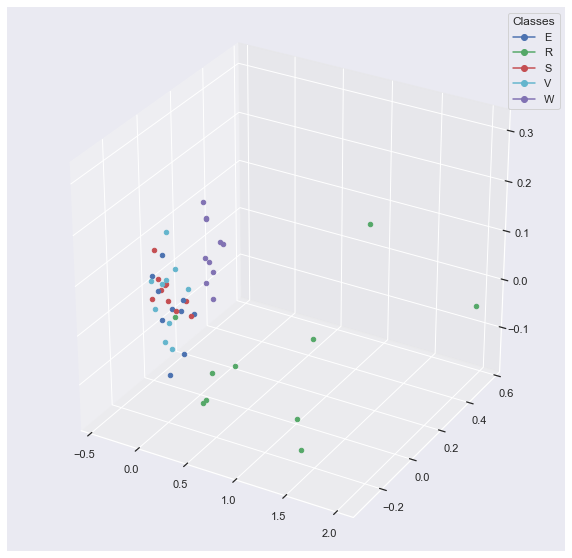

In [62]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['E', 'R', 'S', 'V', 'W'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

For comparison with the large array, will retain all 14 features (without performing PCA, to enable fair comparison with the larger array)

In [63]:
n_components = None

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [64]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 316.22776601683796}
Best score: 0.525






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 316.22776601683796}
Best score: 0.525
All parameter combinations tested:
1 {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 0.31622776601683794} nan
2 {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 316.22776601683796} 0.525
3 {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'Logi

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.1767766952966369}
Best score: 0.425






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 0.1767766952966369}
Best score: 0.425
All parameter combinations tested:
1 {'LinearSVC__C': 2.0} 0.4
2 {'LinearSVC__C': 8.0} 0.375
3 {'LinearSVC__C': 2896.309375740099} 0.325
4 {'LinearSVC__C': 4096.0} 0.325
5 {'LinearSVC__C': 0.1767766952966369} 0.425
6 {'LinearSVC__C': 1.0} 0.425
7 {'LinearSVC__C': 23170.47500592079} 0.325
8 {'LinearSVC__C': 0.3535533905932738} 0.425
9 {'LinearSVC__C': 128.0} 0.325
10 {'LinearSVC__C': 1448.1546878700494} 0.325
11 {'LinearSVC__C': 32768.0} 0.325
12 {'LinearSVC__C': 4.0} 0.375
13 {'LinearSVC__C': 362.03867196751236} 0.325
14 {'LinearSVC__C': 90.50966799187809} 0.325
15 {'LinearSVC__C': 22.627416997969522} 0.3
16 {'LinearSVC__C': 0.03125} 0.425
17 {'LinearSVC__C': 5792.618751480198} 0.325
18 {'LinearSVC__C': 11.313708498984761} 0.35
19 {'LinearSVC__C': 5.656854249492381} 

In [65]:
score_df

Algorithm Resampling_method  \
0    LogisticRegression      no_balancing   
1  KNeighborsClassifier      no_balancing   
2            GaussianNB      no_balancing   
3             LinearSVC      no_balancing   
4                   SVC      no_balancing   

                                         Best_params  Best_accuracy_score  \
0  {'LogisticRegression__solver': 'saga', 'Logist...                0.525   
1  {'KNeighborsClassifier__weights': 'uniform', '...                0.550   
2                                                 {}                0.525   
3               {'LinearSVC__C': 0.1767766952966369}                0.425   
4  {'SVC__gamma': 0.0013810679320049757, 'SVC__C'...                0.550   

   Mean_accuracy_score  Std_dev_accuracy_score  
0             0.439706                0.115291  
1             0.471000                0.126795  
2             0.525000                0.093541  
3             0.359000                0.142567  
4             0.398000                0.159116

So, from this spot check, a **support vector classifier with radial basis function kernel** does a good job.

So, run hyperparameter optimisation for SVC.

In [66]:
fixed_params = ml.define_fixed_model_params(clf=SVC())
random_tuned_params = ml.define_tuned_model_params(clf=SVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.125, 'SVC__C': 4096.0}
Best score: 0.525


In [68]:
grid_tuned_params = {'C': np.linspace(10, 5000, 500),
                     'gamma': np.linspace(0.001, 0.2, 200)}

svc_grid_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'SVC__C': 20.0, 'SVC__gamma': 0.083}
Best score: 0.525


### So, optimal hyperparameter combination:
- C = 20
- gamma = 0.083

Model cross-validation score: [0.5   0.375 0.5   0.375 0.625]
accuracy_score: 0.6
recall_score: 0.6
precision_score: 0.5333333333333333
f1_score: 0.5599999999999999
cohen_kappa_score: 0.5
None


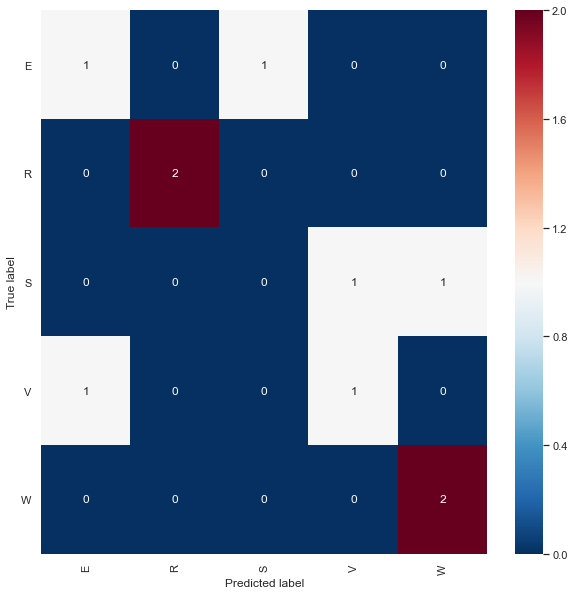

true


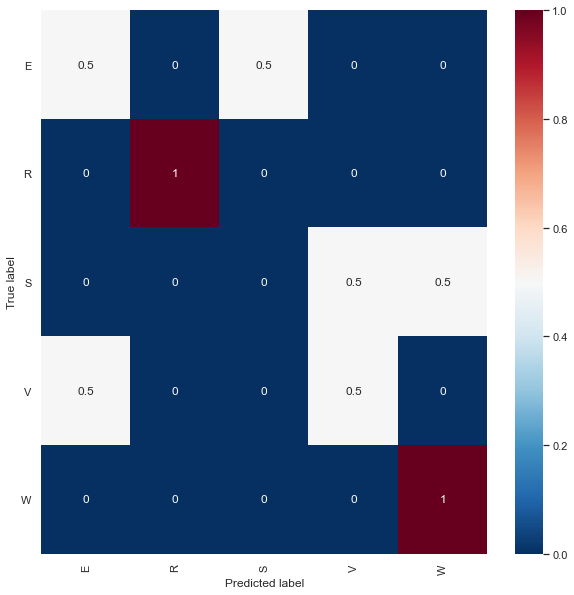

pred


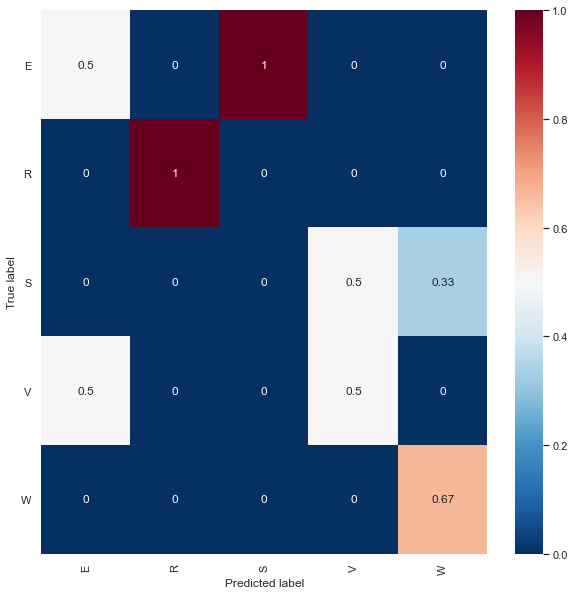

In [69]:
final_params = {'C': 20,
                'gamma': 0.083}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

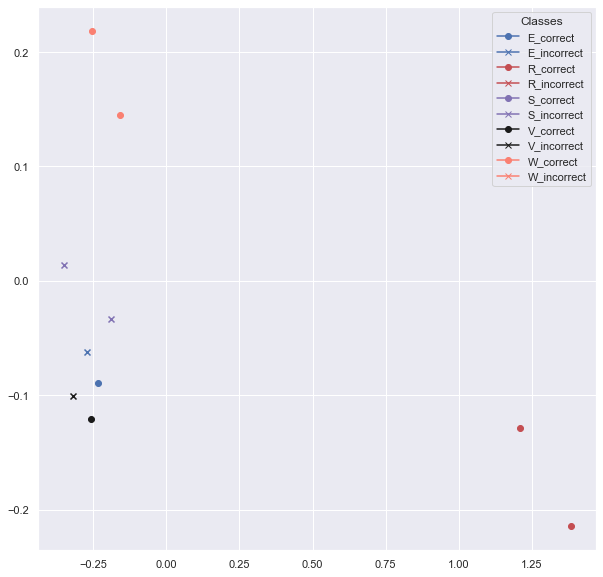

In [70]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['E_correct', 'E_incorrect', 'R_correct', 'R_incorrect', 'S_correct', 'S_incorrect', 'V_correct',
                'V_incorrect', 'W_correct', 'W_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

The performance of the models trained on the two arrays is very similar. Interestingly, they do not find the same amino acids most difficult to distinguish - the smaller array separates the signal from R more easily than any of the other amino acids, whereas the larger array finds R much harder to distinguish (compare the two PCA plots).